# 2.3. The transform plane

<img src="img/cover-2-3.png" />

## Contents

* **[Introduction](#intro)**
* **[2.3.1. The $z$ and $s$ domains](#231)**
    * [Complex exponentials as eigenfunctions](#complex_exponentials)
    * [The $z$-transform](#z_transform)
        * **Example**: [The unit delay](#example_unit_delay)
        * **Example**: [Spencer smoother](#example_spencer_smoother)
    * [The Laplace transform](#laplace_transform)
        * **Example**: [Time shift](#example_time_shift)
    * [Convergence](#convergence)
    * [Transform pairs](#transform_pairs)
* **[2.3.2. Properties of the $z$ and Laplace transforms](#232)**
    * [Linearity](#linearity)
    * [Translation](#translation)
    * [Convolution](#convolution)
    * [The transfer function](#transfer_function)
    * [Problem solving with transforms](#problem_solving)
    * [Integration and differentiation](#integration_differentiation)
    * [Inversion](#inversion)
    * [Finite signals](#finite)
    * [Right-sided, exponentially bounded signals](#right_sided)
        * **Example**: [Exponential boundedness and the ROC](#example_exponential_boundedness_roc)
    * [Stability](#stability)
    * [Linenar difference equations](#diff_eq)
        * **Example**: [A rational transfer function](#example_rational_tf)

<a id="intro"></a>
***

## Introduction

**TODO: Write intro**

<a id="231"></a>
***
## 2.3.1. The $z$ and $s$ domains

As we discussed in the last chapter, LTI systems are **linear** in the same sense as linear operators between vector spaces. Recall a linear operator $T : U \to U$ has special scalars $\lambda$ called **eigenvalues** such that, for certain input vectors $u$,

$$ T(u) = \lambda\,u $$

That is, for these input **eigenvectors**, the operator has the action of *scaling* the vector by the factor $\lambda$.

In our case, where $T$ takes input signals and produces output signals, we have a similar setup; hence, we may ask the question: what *are* the "eigenvectors" and "eigenvalues" of LTI systems? As it happens, the signals that serve as eigenvectors for LTI systems—also called **eigenfunctions**—posess a straightforward form. Consider a discrete time system $T$, and let

$$ x(n) = z^n $$

for some $z \in \mathbb{R}$. Then, denoting the system's impulse response by $h(n)$, we have that the system's output for $x$ is given by the convolution sum

$$
\begin{eqnarray*}
    y(n) & = & \sum_{i=-\infty}^\infty x(i)\,h(n-i) \\
     & = & \sum_{i=-\infty}^\infty z^n\,h(n-i) \\
     & = & \sum_{i=-\infty}^\infty h(i)\,z^{n-i}\quad\textrm{(*)} \\
     & = & \sum_{i=-\infty}^\infty h(i)\,z^n\,z^{-i} \\
     & = & z^n \left(\sum_{i=-\infty}^\infty h(i)\,z^{-i} \right) \\
     & = & H(z)\,z^n = H(z)\,x(n)
\end{eqnarray*}
$$

(The step at (\*) comes because convolution is commutative; hence, we can swap the role of $h(n)$ and $x(n) = z^n$.)

So we've seen that such exponentials $z^n$ serve as **eigenfunctions** for discrete LTI systems! The corresponding **eigenvalue** is $H(z)$ is a function of the impulse response $h(n)$ and the base of the exponential $z$, given by

$$ H(z) = \sum_{i=-\infty}^\infty h(i)\,z^{-i} $$

which we will see has a tremendous role to play in describing and computing a system's response to inputs.

We can play the same game in the continuous case; this time, we consideer a continuous system $T$ with impulse response $h(t)$ and the input exponential

$$ x(t) = \mathrm{e}^{s\,t} $$

for some $s \in \mathbb{R}$. Now, once again, we can take a few algebraic steps to show that $x$ is indeed an eigenfunction of $T$, starting from the convolution integral:

$$
\begin{eqnarray*}
    y(t) & = & \int_{-\infty}^\infty x(\tau)\,h(t-\tau)\,\mathrm{d}\tau \\
     & = & \int_{-\infty}^\infty \mathrm{e}^{s\,\tau}\,h(t-\tau)\,\mathrm{d}\tau \\
     & = & \int_{-\infty}^\infty h(\tau)\,\mathrm{e}^{s(t-\tau)}\,\mathrm{d}\tau \\
     & = & \int_{-\infty}^\infty h(\tau)\,\mathrm{e}^{s\,t}\,\mathrm{e}^{-s\,\tau}\,\mathrm{d}\tau \\
     & = & \mathrm{e}^{s\,t}\,\int_{-\infty}^\infty h(\tau)\,\mathrm{e}^{-s\,\tau}\,\mathrm{d}\tau \\
     & = & H(s)\,\mathrm{e}^{s\,t} = H(s)\,x(t)
\end{eqnarray*}
$$

Once again we see that our exponential is an eigenfunction of the continuous system $T$, with an eigenvalue given by the integral

$$ H(s) = \int_{-\infty}^\infty h(\tau)\,\mathrm{e}^{-s\,\tau}\,\mathrm{d}\tau $$

This expression is a function of both the impulse response $h(t)$ of the system, as well as the parameter of the exponential input $s$, by analogy with the above discrete case.

<a id="complex_exponentials"></a>
***

### Complex exponentials as eigenfunctions

In an earlier section, we took a look at the properties of **complex exponentials**, and how they provide us a parsimonious representation of *oscillatory* phenomena. We might ask then: what's stopping us from replacing the *real* values of $z$ or $s$ above with values in $\mathbb{C}$?

Let's take an example: suppose we have a discrete signal given by

$$ x(n) = \cos(\omega\,n) $$

for some $\omega \in \mathbb{R}$, representing the *angular frequency* of the oscillation. Recall that, by Euler's identity,

$$
\begin{eqnarray*}
    \mathrm{e}^{\mathrm{i}x} & = & \cos(x) + \mathrm{i}\,\sin(x) \\
    \therefore\, \mathrm{e}^{\mathrm{i}x} + \mathrm{e}^{-\mathrm{i}x} & = & (\cos(x) + \mathrm{i}\,\sin(x)) + (\cos(x) + \mathrm{i}\,\sin(-x)) \\
     & = & 2\,\cos(x) + \mathrm{i}\,(\sin(x) - \sin(x)) \\
     & = & 2\,\cos(x) \\
    \therefore\,\cos(x) & = & \frac{1}{2}\left(\mathrm{e}^{\mathrm{i}x} + \mathrm{e}^{-\mathrm{i}x}\right)
\end{eqnarray*}
$$

Hence, we can represent our signal as a linear combination of *complex exponentials*:

$$ x(n) = \cos(\omega\,n) = \frac{1}{2}\left(\mathrm{e}^{\mathrm{i}\omega n} + \mathrm{e}^{-\mathrm{i}\omega n}\right)$$

Now, suppose that we put this through a discrete system $T$ with impulse response $h(n)$; then, first, we note that the output is given by

$$ y(n) = \frac{1}{2}T\left(\mathrm{e}^{\mathrm{i}\omega n}\right) + \frac{1}{2}T\left(\mathrm{e}^{-\mathrm{i}\omega n}\right)$$

by the *linearity* of $T$. Second, note that both of these inputs fall into the pattern we investigated above—namely, these are precisely $z^n$ with

$$ z = \mathrm{e}^{\mathrm{i}\omega} \quad\textrm{ or }\quad z = \mathrm{e}^{-\mathrm{i}\omega} $$

This means that we know the outputs for both of these inputs—we just derived them! They come precisely from our eigenvalue expressions:

$$
\begin{eqnarray*}
    T\left(\mathrm{e}^{\mathrm{i}\omega n}\right) & = & H(\mathrm{e}^{\mathrm{i}\omega})\,\mathrm{e}^{\mathrm{i}\omega n} \\
    T\left(\mathrm{e}^{-\mathrm{i}\omega n}\right) & = & H(\mathrm{e}^{-\mathrm{i}\omega})\,\mathrm{e}^{-\mathrm{i}\omega n}
\end{eqnarray*}
$$

where, for example,

$$ H(\mathrm{e}^{\mathrm{i}\omega}) = \sum_{k=-\infty}^\infty h(k)\,\mathrm{e}^{-\mathrm{i}\omega k} $$

Putting these results together, we can compute the final output:

$$
\begin{eqnarray*}
    y(n) & = & \frac{1}{2}T\left(\mathrm{e}^{\mathrm{i}\omega n}\right) + \frac{1}{2}T\left(\mathrm{e}^{-\mathrm{i}\omega n}\right) \\
     & = & \frac{1}{2} H(\mathrm{e}^{\mathrm{i}\omega})\,\mathrm{e}^{\mathrm{i}\omega n} + \frac{1}{2}H(\mathrm{e}^{-\mathrm{i}\omega})\,\mathrm{e}^{-\mathrm{i}\omega n}
\end{eqnarray*}
$$

So we see that the decomposition of signals into complex exponentials allows us to leverage properties—for example, the eigenfunction property—that allow us to see a different side of the output of an LTI system. Here, our representation of the output isn't in terms of scaled and shifted impulses or impulse responses, as it was in the last section; now, we are beginning to see the output's decomposition as scaled combinations of *complex exponentials*.

Of course, where in this segment we were interested in investigating the complex value $z = \mathrm{e}^{\mathrm{i}\omega}$, there is no need to restrict ourselves to this form; indeed we could conceivably make an exponential $z^n$ out of *any* complex value $z$ (in discrete time, or an exponential $\mathrm{e}^{st}$ for a complex $s$ in continuous time), and the formalism all remains the same! The only difference is that we must generalize our notion of a signal's *data* from being in $\mathbb{R}$ (real-valued) to being in $\mathbb{C}$ (complex-valued).

<a id="z_transform"></a>
***

### The $z$-transform

Given a discrete signal $h$ as in the example above, the function specifying the *eigenvalue* for a given complex exponential $z^n$ specified by

$$ H(z) = \sum_{k=-\infty}^\infty h(k) z^{-k} $$

is called the **$z$-transform** of $h$. Note that this is a function *from* complex numbers *to* complex numbers, $H: \mathbb{C} \to \mathbb{C}$. Let's get an idea of what this looks like with an example:

<a id="example_unit_delay"></a>
***

#### **Example**: The unit delay

One of the crucial classes of systems we looked at in the previous section were the *delay systems*; indeed, these were used as the basis of our definition of *translation-invariance*. In the discrete realm, the delay systems $D_k$ are indexed by the integers, $k \in \mathbb{Z}$. Let's start by looking at the simplest of them all—the **unit delay** system $D_1$:

$$ y(n) = x(n-1) $$

This system is *translation-invariant*, as it commutes with any other delay system; indeed, we can see that composing delay systems yields another delay system, which we can break apart any way we like:

$$ D_1 \circ D_k = D_{k+1} = D_k \circ D_1 $$

This system is also *linear*, which we can check explicitly by looking at the two facets of structure-preservation for vector spaces:

$$
\begin{eqnarray*}
    D_1(\alpha\,x(n)) & = & \alpha x(n-1) = \alpha\,D_1(x(n)) \\
    D_1(x_1(n) + x_2(n)) & = & x_1(n-1) + x_2(n-1) = D_1(x_1(n)) + D_1(x_2(n))
\end{eqnarray*}
$$

Since this system is LTI, it is characterized by its *impulse response*, which we can compute by checking the system's response to an impulse:

$$ D_1(\delta(n)) = \delta(n-1) $$

(Note that this system has a natural inverse, which is given by translation in the opposite direction $D_{-1}$; by analogy, $D_{-1}$'s impulse response is given by

$$ D_{-1}(\delta(n)) = \delta(n+1) $$

We can explicitly see by convolving the two systems' impulse responses that

$$ \delta(n-1) \ast \delta(n+1) = \sum_{k=-\infty}^\infty \delta(k-1)\,\delta(n-k+1) $$

The first term is only nonzero for the $k=1$ term in the sum; when that is the case, the second term is precisely $\delta(n)$. Hence, the two systems are inverses, $D_{-1} = D_1^{-1}$).

How does the delay system behave for complex exponential inputs in particular? Let's take a look at the system's *$z$-transform*, which we'll denote $D_1(z)$:

$$
\begin{eqnarray*}
    D_1(z) & = & \sum_{k=-\infty}^\infty \delta(k-1) z^{-k} \\
     & = & z^{-1}
\end{eqnarray*}
$$

where the reduction of the sum came because $\delta(k-1)$ is only nonzero for $k = 1$.

(Note that many textbooks and other resources will actually use $z^{-1}$ as the symbol for the discrete unit delay!)

As a function of a complex variable, we can break this up more descriptively into two components: the **magnitude** $|D_1(z)|$, which describes how much the system *amplifies* or *attenuates* a given complex exponential input; and the **phase** $\measuredangle D_1(z)$, which describes the effect the system has on the instantaneous angle of the output signal. Although in any given case computing a symbolic representation for the magnitude or phase of a system's $z$-transform might be challenging, we can easily compute approximations to them. For example, below is a plot of $D_1(z)$ in a portion of the complex plane:

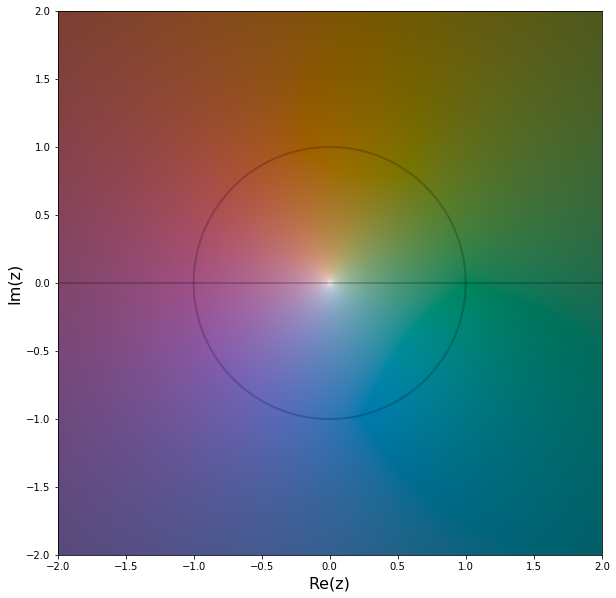

In [155]:
import cplot
import numpy

def H(z):
    return np.power( z, -1. )

plt.figure( figsize = (10, 10) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.5 )

plt.plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )
plt.plot( np.array([-2, 2]), np.array([0, 0]), 'k-', linewidth = 2, alpha = 0.2 )

plt.xlim( -2, 2 )

plt.show()

In this representation, the **hue** of the displayed color represents $\measuredangle D_1(z)$, while the **luminosity** (from black to white) represents $|D_1(z)|$ (from $0$ to $\infty$). The circle around the origin is the contour $|z| = 1$, which includes all of the values $z = \mathrm{e}^{\mathrm{i}\omega}$ discussed above.

We can see that there is a point in the center (at $z = 0$) that appears to get bright white; indeed, if we were to take a plot of $|D_1(z)|$ through the indicated black line (the real axis), we would see the following:

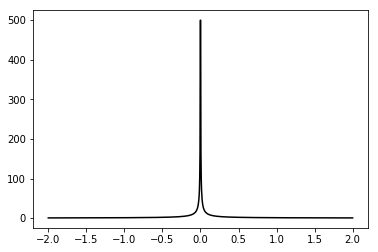

In [52]:
import numpy
import matplotlib.pyplot as plt

def H(z):
    return np.power( z, -1. )

z_all = np.linspace( -2., 2., 1000 )
Habs = np.abs( H( z_all ) )

plt.plot( z_all, Habs, 'k-' )
plt.show()

Looking at the equation for $D_1(z)$, this should make sense: $z^{-1}$ has a singularity where $z = 0$. Hence, from our discussion of complex functions, we would call $0$ a **pole** of $D_1(z)$.

By the same token, we note that as we travel out in any direction, the coloros get darker and darker toward black; and indeed, intuitively, we note that for $D_1(z) = z^{-1}$, the output value should be *smaller* as $z$ gets *bigger*. One way to think about this is to imagine the complex plane $\mathbb{C}$ wrapped around a *sphere*, $S^2$, with $0$ on the bottom of the sphere and every direction radiating out from the origin converging on the antipodal point. Now, $\mathbb{C}$ is *not* a sphere; however, we can treat it as such by adding in a single point, $\infty$, to denote that antipodal point of the sphere that everything runs away toward. This construction is known as the **Riemann sphere**, and it simplifies how we deal with infinities in the complex plane. Instead of making remarks about the behavior of $D_1(z)$ as $z \to \infty$ in various directions, for example, we can make a simple statement: $D_1(z)$ has a **zero at $\infty$**.

We can visualize this in 3D, too! Consider the rainbow plot above for $D_1(z)$; we can plot the magnitude and angle components of this plot directly on the Riemann sphere. First, we have the *bottom* which is the region surrounding the origin:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


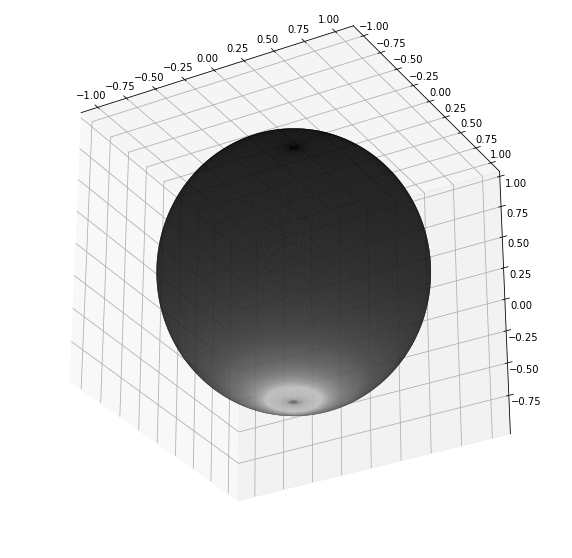

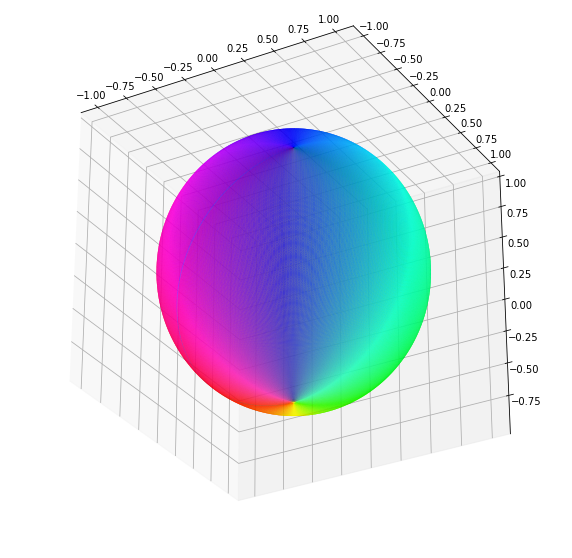

In [104]:
# Taken from https://stackoverflow.com/questions/24218543/colouring-the-surface-of-a-sphere-with-a-set-of-scalar-values-in-matplotlib

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

(n, m) = (500, 500)

# Meshing a unit sphere according to n, m 
theta = np.linspace(0, 2 * np.pi, num=n, endpoint=False)
phi = np.linspace(np.pi * (-0.5 + 1./(m+1)), np.pi*0.5, num=m, endpoint=False)
theta, phi = np.meshgrid(theta, phi)
theta, phi = theta.ravel(), phi.ravel()
theta = np.append(theta, [0.]) # Adding the north pole...
phi = np.append(phi, [np.pi*0.5])
mesh_x, mesh_y = ((np.pi*0.5 - phi)*np.cos(theta), (np.pi*0.5 - phi)*np.sin(theta))
triangles = mtri.Triangulation(mesh_x, mesh_y).triangles
x, y, z = np.cos(phi)*np.cos(theta), np.cos(phi)*np.sin(theta), np.sin(phi)

# Defining a custom color scalar field
#vals = np.sin(6*phi) * np.sin(3*theta)
c_re = x / (1 - z)
c_im = y / (1 - z)
c_comp = c_re + c_im * 1.j

vals = np.abs( np.power( c_comp, -1. ) )
vals[np.isinf( vals )] = 0.
vals[np.isnan( vals )] = 0.
colors = np.mean( vals[triangles], axis=1 )

vals2 = np.angle( np.power( c_comp, -1. ) )
vals2[np.isinf( vals2 )] = 0.
vals2[np.isnan( vals2 )] = 0.
colors2 = np.mean( vals2[triangles], axis = 1 )

# Plotting
fig = plt.figure( figsize = (10, 10) )
ax = fig.gca(projection='3d')
ax.view_init( -30 )
cmap = plt.get_cmap('binary_r')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cmap, shade=False, linewidth=0., vmin = 0., vmax = 10.)
collec.set_array(colors)
#collec.autoscale()
plt.show()

fig = plt.figure( figsize = (10, 10) )
ax = fig.gca(projection='3d')
ax.view_init( -30 )
cmap = plt.get_cmap('hsv')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cmap, shade=False, linewidth=0.)
collec.set_array(colors2)
collec.autoscale()
plt.show()

Notice the little point of light at the bottom of the sphere; this is where the pole at $0$ is located.

Now, from the top:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


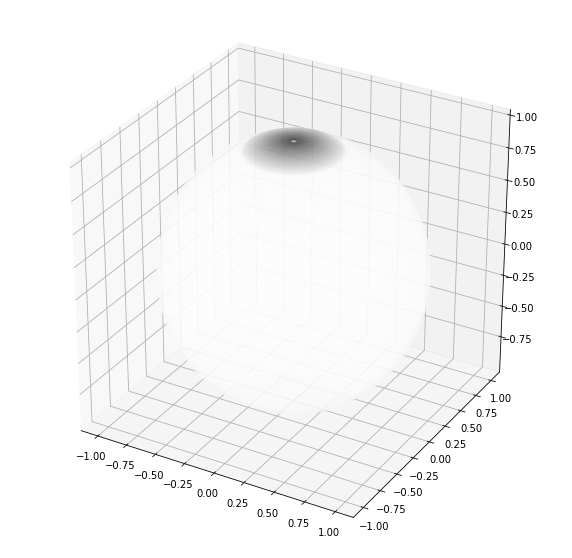

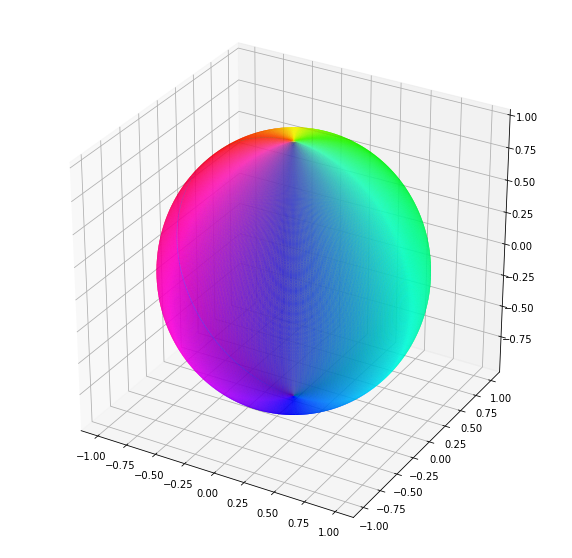

In [112]:
# Taken from https://stackoverflow.com/questions/24218543/colouring-the-surface-of-a-sphere-with-a-set-of-scalar-values-in-matplotlib

(n, m) = (500, 500)

# Meshing a unit sphere according to n, m 
theta = np.linspace(0, 2 * np.pi, num=n, endpoint=False)
phi = np.linspace(np.pi * (-0.5 + 1./(m+1)), np.pi*0.5, num=m, endpoint=False)
theta, phi = np.meshgrid(theta, phi)
theta, phi = theta.ravel(), phi.ravel()
theta = np.append(theta, [0.]) # Adding the north pole...
phi = np.append(phi, [np.pi*0.5])
mesh_x, mesh_y = ((np.pi*0.5 - phi)*np.cos(theta), (np.pi*0.5 - phi)*np.sin(theta))
triangles = mtri.Triangulation(mesh_x, mesh_y).triangles
x, y, z = np.cos(phi)*np.cos(theta), np.cos(phi)*np.sin(theta), np.sin(phi)

# Defining a custom color scalar field
#vals = np.sin(6*phi) * np.sin(3*theta)
c_re = x / (1 - z)
c_im = y / (1 - z)
c_comp = c_re + c_im * 1.j

vals = np.abs( np.power( c_comp, -1. ) )
vals[np.isinf( vals )] = 0.
vals[np.isnan( vals )] = 0.
colors = np.mean( vals[triangles], axis=1 )

vals2 = np.angle( np.power( c_comp, -1. ) )
vals2[np.isinf( vals2 )] = 0.
vals2[np.isnan( vals2 )] = 0.
colors2 = np.mean( vals2[triangles], axis = 1 )

# Plotting
fig = plt.figure( figsize = (10, 10) )
ax = fig.gca(projection='3d')
ax.view_init( +30 )
cmap = plt.get_cmap('binary_r')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cmap, shade=False, linewidth=0., vmin = 0., vmax = 0.2)
collec.set_array(colors)
#collec.autoscale()
plt.show()

fig = plt.figure( figsize = (10, 10) )
ax = fig.gca(projection='3d')
ax.view_init( +30 )
cmap = plt.get_cmap('hsv')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cmap, shade=False, linewidth=0.)
collec.set_array(colors2)
collec.autoscale()
plt.show()

Here the color scale has been modified in order to more clearly show the zero at the top of the sphere, at the **point at $\infty$**. (Note that the tiny white dot exactly at $\infty$ is an artifact of the plotting method.)

**TODO: Fix the amplitude sphere plots to have a colormap that isn't broken**

<a id="example_spencer_smoother"></a>
***

#### **Example**: Spencer smoother

Once again, we'll take a look at the **Spencer smoother**, which has the impulse response

$$ h(n) =
\left\{
\begin{array}{ll}
    0, & n < 0,\,n > 14 \\
    \frac{a_n}{\sum_k a_k}, & 0 \leq n \leq 14
\end{array}
\right.
$$

where

$$ a_{0:14} = \left[-3,\,-6,\,-5,\,3,\,21,\,46,\,67,\,74,\,67,\,46,\,21,\,3,\,-5,\,-6,\,-3\right] $$

This time, we'll have a look at the $z$-transform, which is given by

$$ H(z) = \sum_{k=-\infty}^\infty h(k)\,z^{-k} $$

Since $h$ is nonzero for only a finite number of terms, this reduces to a finite **polynomial in $z^{-1}$**:

$$ H(z) = \sum_{k=0}^{14} h(k)\,z^{-k} $$

which, explicitly written out, is

$$ H(z) = \frac{-3}{320} + \frac{-6}{320}\,z^{-1} + \frac{-5}{320}\,z^{-2} + \ldots $$

We can plug this into a [computer algebra system](https://www.wolframalpha.com/input/?i=zeros+of+%281%2F320%29+*+%28-3+-6z%5E-1+-5z%5E-2+%2B3z%5E-3%2B+21z%5E-4%2B+46z%5E-5%2B+67z%5E-6%2B+74z%5E-7%2B+67z%5E-8+%2B46z%5E-9%2B+21z%5E-10%2B+3z%5E-11+-5z%5E-12+-6z%5E-13+-3z%5E-14%29) in order to obtain the *zeros* and (with a slight modification) [*poles*](https://www.wolframalpha.com/input/?i=poles+of+%28-3+-6z%5E-1+-5z%5E-2+%2B3z%5E-3%2B+21z%5E-4%2B+46z%5E-5%2B+67z%5E-6%2B+74z%5E-7%2B+67z%5E-8+%2B46z%5E-9%2B+21z%5E-10%2B+3z%5E-11+-5z%5E-12+-6z%5E-13+-3z%5E-14%29) of this function: as one might expect, given that it is composed of $z^{-1}$ atoms, this $z$-transform turns out to have a pole smack-dab at $0$ once again. The zeros, however, turn out to be much more interesting; there are 11 of them arranged throughout the plane, and they give a very distinctive pattern to the $z$-plot of this transform. First, let's remind ourselves of the "shape" of the Spencer smoother's impulse response:

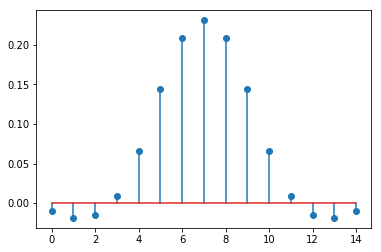

In [20]:
import numpy as np
import matplotlib.pyplot as plt

spencer_a = np.array( [ -3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 21, 3, -5, -6, -3] )

n_all = np.arange( spencer_a.shape[0] )
h = spencer_a / np.sum( spencer_a )

plt.stem( n_all, h )
plt.show()

Now, here's what its $z$-transform looks like in the $z$ domain:

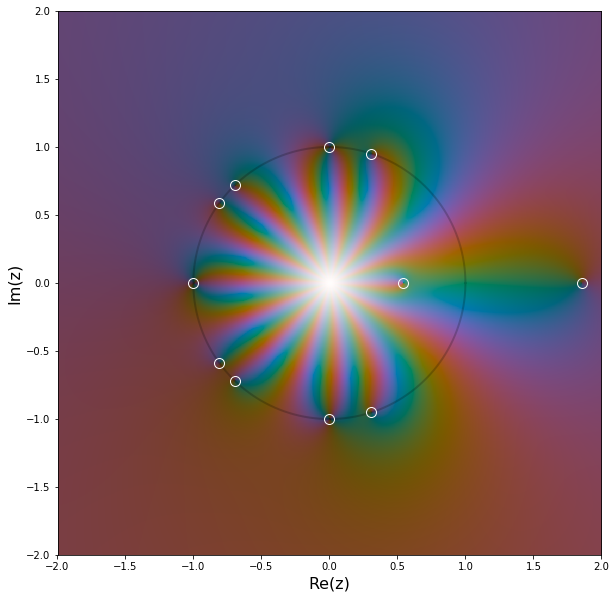

In [123]:
import cplot
import numpy

z0 = np.array( [
    -1.,
    +1.j,
    -1.j,
    -np.power(-1. + 0.j, 1./5.),
    np.power(-1. + 0.j, 2./5.),
    -np.power(-1. + 0.j, 3./5.),
    np.power(-1. + 0.j, 4./5.),
    (1./12) * (3. + np.sqrt(129.) - np.sqrt(6. * (np.sqrt(129.) - 1.))),
    (1./12) * (3. + np.sqrt(129.) + np.sqrt(6. * (np.sqrt(129.) - 1.))),
    (1./12) * (3. - np.sqrt(129.) - 1j * np.sqrt(6. * (1. + np.sqrt(129.)))),
    (1./12) * (3. - np.sqrt(129.) + 1j * np.sqrt(6. * (1. + np.sqrt(129.))))
] )

def H(z):
    ret = complex( 0. )
    for k in range( spencer_a.shape[0] ):
        ret += h[k] * np.power( z, -k )
    return ret

plt.figure( figsize = (10, 10) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.1 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )

plt.plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )


Here, we've highlighted the zeros of $H(z)$ with white circles.

**TODO: Insights**

Once again, we can visualize this on the Riemann sphere:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


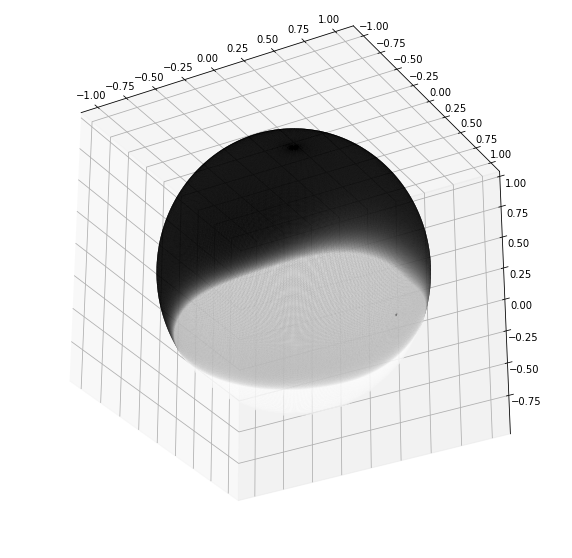

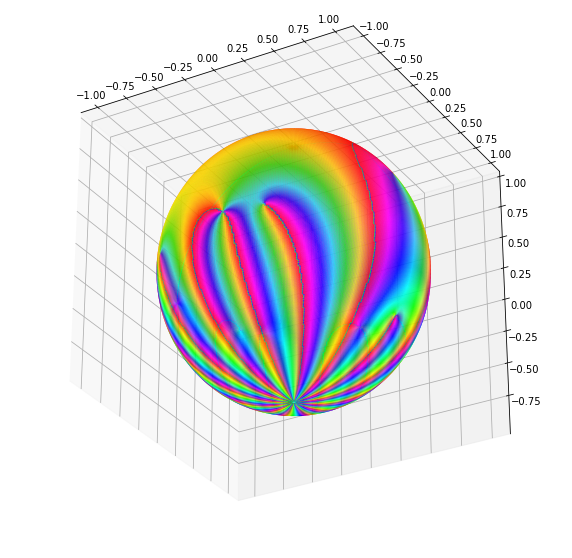

In [126]:
# Taken from https://stackoverflow.com/questions/24218543/colouring-the-surface-of-a-sphere-with-a-set-of-scalar-values-in-matplotlib

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

(n, m) = (500, 500)

# Meshing a unit sphere according to n, m 
theta = np.linspace(0, 2 * np.pi, num=n, endpoint=False)
phi = np.linspace(np.pi * (-0.5 + 1./(m+1)), np.pi*0.5, num=m, endpoint=False)
theta, phi = np.meshgrid(theta, phi)
theta, phi = theta.ravel(), phi.ravel()
theta = np.append(theta, [0.]) # Adding the north pole...
phi = np.append(phi, [np.pi*0.5])
mesh_x, mesh_y = ((np.pi*0.5 - phi)*np.cos(theta), (np.pi*0.5 - phi)*np.sin(theta))
triangles = mtri.Triangulation(mesh_x, mesh_y).triangles
x, y, z = np.cos(phi)*np.cos(theta), np.cos(phi)*np.sin(theta), np.sin(phi)

# Defining a custom color scalar field
#vals = np.sin(6*phi) * np.sin(3*theta)
c_re = x / (1 - z)
c_im = y / (1 - z)
c_comp = c_re + c_im * 1.j

vals = np.abs( np.array( [H(z) for z in c_comp] ) )
vals[np.isinf( vals )] = 0.
vals[np.isnan( vals )] = 0.
colors = np.mean( vals[triangles], axis=1 )

vals2 = np.angle( np.array( [H(z) for z in c_comp] ) )
vals2[np.isinf( vals2 )] = 0.
vals2[np.isnan( vals2 )] = 0.
colors2 = np.mean( vals2[triangles], axis = 1 )

# Plotting
fig = plt.figure( figsize = (10, 10) )
ax = fig.gca(projection='3d')
ax.view_init( -30 )
cmap = plt.get_cmap('binary_r')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cmap, shade=False, linewidth=0., vmin = 0., vmax = 10.)
collec.set_array(colors)
#collec.autoscale()
plt.show()

fig = plt.figure( figsize = (10, 10) )
ax = fig.gca(projection='3d')
ax.view_init( -30 )
cmap = plt.get_cmap('hsv')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cmap, shade=False, linewidth=0.)
collec.set_array(colors2)
collec.autoscale()
plt.show()

**TODO: More insights**

<a id="laplace_transform"></a>
***

### The Laplace transform

In the case of a *continuous* LTI system $T$ with impulse response $h$, we saw that the eigenvlaue for a complex exponential input $\mathrm{e}^{s\,t}$ was given by

$$ H(s) = \int_{-\infty}^\infty h(t)\,\mathrm{e}^{-s\,t}\,\mathrm{d}t $$

Analogously to the $z$-transform above, this function $H$—which assigns the eigenvalue associated with the exponential parameter $s$—is known as the **Laplace transform**. Note again that this is a function *from* complex numbers *to* complex numbers, $H: \mathbb{C} \to \mathbb{C}$. As we will see, these two transforms have very similar behavior in a number of situations; in fact, the two are closely related to one another through the process of *discretization*—but more on this later!

<a id="example_time_shift"></a>
***

#### **Example**: Time shift

Above we took a look at the discrete *unit delay* system; now let's have a look at the equivalent continuous system, the *time shift* by $t_0$:

$$ y(t) = x(t - t_0) $$

This system is linear and translation-invariant (although it's worth it to check these properties to make sure they hold!); therefore, it is reasonable to investigate what the system's *impulse response* is by looking at the output when the input $x(t)$ is the unit impulse $\delta(t)$:

$$ h(t) = \delta(t - t_0) $$

Using the formula above, this means that the Laplace transform of this system is given by

$$
\begin{eqnarray*}
    H(s) & = & \int_{-\infty}^\infty \delta(t-t_0)\,\mathrm{e}^{-st}\,\mathrm{d}t \\
     & = & \mathrm{e}^{-s t_0}
\end{eqnarray*}
$$

Again, we can plot what this looks like in the complex plane:

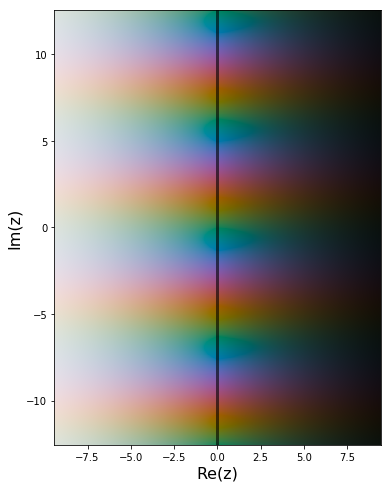

In [410]:
import cplot
import numpy
import numpy as np
from functools import reduce

t0 = 1.

def H(s):
    return np.exp( -s * t0 )

plt.figure( figsize = (8, 8) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -3*np.pi, 3*np.pi, -4*np.pi, +4*np.pi, 1000, 1000, alpha = 0.25 )

yl = plt.ylim()
plt.plot( np.array( [0, 0] ), yl, 'k-', linewidth = 3, alpha = 0.6 )

plt.ylim( yl )
plt.xlim( -3*np.pi, 3*np.pi )
plt.show()

Notice based on the formula that, along the imaginary axis—that is, with $s = \mathrm{i}\omega$ for some real $\omega$—the Laplace transform has a magnitude of $1$; however, the *argument* of the Laplace transform, $\angle H(s)$, varies periodically across the value of $\omega$, as shown by the array of colors!

<a id="convergence"></a>
***

### Convergence

One tricky detail that comes up when working with these transforms is that they do not always **converge**. To see this, let's take an example. Suppose we have a discrete LTI system $T$ with impulse response

$$ h(n) = \sqrt{2}^n\,\theta(n) $$

where $\theta$ is the unit step function. The $z$-transform of this system, then, is given by

$$
\begin{eqnarray*}
    H(z) & = & \sum_{k=-\infty}^\infty \left(\sqrt{2}\right)^k\,\theta(k)\,z^{-k} \\
     & = & \sum_{k=0}^\infty \left(\sqrt{2}\right)^k\,z^{-k}
\end{eqnarray*}
$$

where the reduction follows from the fact that $\theta(n)$ is zero for $n < 0$. The real question, then, is this: does this sum *actually exist*? There is no guarantee, as yet, that this sum actually turns out to be a finite number—and what's worse, this convergence could be different depending on *which value of $z$* is being discussed!

For this, it is convenient to bring in a [theorem of complex numbers](https://en.wikipedia.org/wiki/Absolute_convergence#Proof_that_any_absolutely_convergent_series_of_complex_numbers_is_convergent) (among other objects!):

#### **Theorem**
> Let $(a_n)$ be a sequence of complex numbers, and consider their sum,
>
> $$ \sum_{k=-\infty}^\infty a_k\quad\textrm{(*)} $$
>
> If $(a_n)$ is **absolutely summable**—that is, if
>
> $$ \sum_{k=-\infty}^\infty |a_k| = L,\quad\textrm{for some }L\in\mathbb{R} $$
>
> then (\*) converges to a value $A \in \mathbb{C}$.

Let's apply this to our current scenario. The individual terms of our sum are

$$ \left(\sqrt{2}\right)^k\,z^{-k} = \left(\frac{\sqrt{2}}{z}\right)^{k} $$

Plugging this into the absolute sum, we get

$$ \sum_{k=0}^\infty \left|\left(\frac{\sqrt{2}}{z}\right)^{k}\right| = \sum_{k=0}^\infty \left|\frac{\sqrt{2}}{z}\right|^{k} $$

This is a [geometric series](https://en.wikipedia.org/wiki/Geometric_series#Formula), which has a known summation formula:

$$ \sum_{k=0}^\infty \left|\frac{\sqrt{2}}{z}\right|^{k} = \frac{1}{1-\left|\frac{\sqrt{2}}{z}\right|} $$

However, importantly, this geometric series only converges when a *certain condition* is met—namely, that

$$ \left|\frac{\sqrt{2}}{z}\right| < 1 \Leftrightarrow |z| > \sqrt{2} $$

We can use the same geometric series formula on our original sum to simplify our (non-absolute) sum:

$$ H(z) = \sum_{k=0}^\infty \left(\frac{\sqrt{2}}{z}\right)^k = \frac{1}{1-\frac{\sqrt{2}}{z}} = \frac{z}{z-\sqrt{2}} $$

For completeness, we note that this $z$-transform has a zero at $0$ (from the numerator in this form), as well as a pole at $\sqrt{2}$ (from the denominator). It is also worth noting that, as $z \to \infty$, the $z$ terms in the numerator and denominator dominate, so that $H(z) \to 1$; hence, there is not a pole *or* a zero at $\infty$.

Let's see this plotted in the complex plane:

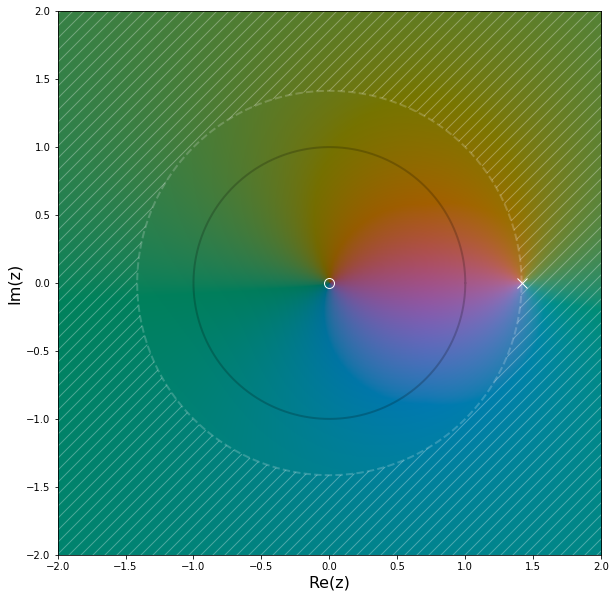

In [143]:
import cplot
import numpy

z0 = np.array( [
    0.
] )

zp = np.array( [
    np.sqrt( 2. )
] )

def H(z):
    ret = z / (z - np.sqrt( 2. ))
    return ret

plt.figure( figsize = (10, 10) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.1 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )

x_unit = np.cos( omega )
y_unit = np.sin( omega )
plt.plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )

x_bd = np.sqrt(2.) * np.cos( omega )
y_bd = np.sqrt(2.) * np.sin( omega )
plt.plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.2 )

n, radii = 50, [np.sqrt(2.), 4.]
theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x_roc = np.outer(radii, np.cos(theta))
y_roc = np.outer(radii, np.sin(theta))
x_roc[1,:] = x_roc[1,::-1]
y_roc[1,:] = y_roc[1,::-1]

plt.fill( np.ravel( x_roc ), np.ravel( y_roc ),
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )

for cur_pole in zp:
    plt.plot( np.real( cur_pole ), np.imag( cur_zero ), 'wx',
              fillstyle = 'none',
              markersize = 10 )
    
plt.xlim( -2, 2 )
plt.ylim( -2, 2 )

plt.show()


Here, once again, the black curve represents the *unit circle*, or $z = \mathrm{e}^\mathrm{i}\,\omega$. The white O indicates the location of $H$'s zero, while the white X denotes the pole at $\sqrt{2}$. Running through this pole is another dashed circle of radius $\sqrt{2}$; this is the curve separating where the sum defining $H(z)$ converges (outside the circle, where the hatching is) and where that sum *diverges* (inside the circle).

The region where the $z$-transform converges is termed the **region of convergence**, or ROC; as we will see from the next example, the ROC is *essential* in fully specifying a $z$-transform, as we will see in the next example.

***

Let's consider another discrete LTI system, $T'$, with its own impulse response $h'$ given by

$$ h'(n) = -\left(\sqrt{2}^n\right)\,\theta(-n-1) $$

Again, $\theta$ is the unit step function; recalling that $\theta(n)$ is $1$ for $n \geq 0$, we note that this implies that $\theta(-n-1)$ is $1$ when $-n-1 \geq 0 \Rightarrow n \leq -1$. This is the "complement" of the step used above $\theta(n)$.

The $z$-transform of this system is given by

$$
\begin{eqnarray*}
    H'(z) & = & \sum_{k=-\infty}^\infty -\left(\sqrt{2}^k\right)\,\theta(-k-1)\,z^{-k} \\
     & = & -\sum_{k=-\infty}^{-1} \left(\frac{\sqrt{2}}{z}\right)^k \\
     & = & -\sum_{l=1}^\infty \left(\frac{z}{\sqrt{2}}\right)^l\quad\textrm{(*)} \\
     & = & 1 - \sum_{l=0}^\infty \left(\frac{z}{\sqrt{2}}\right)^l\quad\textrm{(**)}
\end{eqnarray*}
$$

where (\*) follows by reindexing with $l = -k$, and (\*\*) follows by both adding and subtracting what would be the $l=0$ term (which is equal to $1$).

By our theorem on absolute convergence above, we know that this sum converges when the absolute sum

$$ \sum_{k=0}^\infty \left|\left(\frac{z}{\sqrt{2}}\right)^k\right| = \sum_{k=0}^\infty \left|\frac{z}{\sqrt{2}}\right|^k $$

converges, which, as above, occurs whenever

$$ \left|\frac{z}{\sqrt{2}}\right| < 1 \Leftrightarrow |z| < \sqrt{2} $$

Following again the pattern that we used in the above example, we can rewrite the full sum for $H'(z)$ using the formula for the geometric series:

$$
\begin{eqnarray*}
    H'(z) = 1 - \sum_{k=0}^\infty \left(\frac{z}{\sqrt{2}}\right)^k & = & 1 - \frac{1}{1-\frac{z}{\sqrt{2}}} \\
     & = & 1 - \frac{\sqrt{2}}{\sqrt{2} - z} \\
     & = & \frac{\sqrt{2} - z}{\sqrt{2} - z} - \frac{\sqrt{2}}{\sqrt{2} - z} \\
     & = & \frac{-z}{\sqrt{2} - z} \\
     & = & \frac{z}{z - \sqrt{2}}
\end{eqnarray*}
$$

Hold on a minute! That is precisely the same formula as we determined for $H(z)$ in the previous example above! How odd—the two systems' impulse responses $h$ and $h'$ are *very* different:

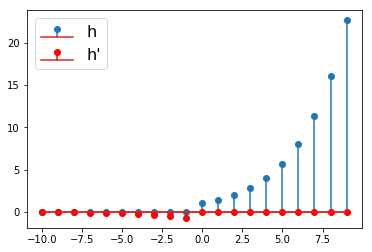

In [152]:
import numpy
import matplotlib.pyplot as plt

n_all = np.arange( -10, 10 )

h1 = np.zeros( n_all.shape )
h1[n_all >= 0] = np.power( np.sqrt(2.), n_all[n_all >= 0] )

h2 = np.zeros( n_all.shape )
h2[n_all < 0] = -1. * np.power( np.sqrt(2.), n_all[n_all < 0] )

plt.stem( n_all, h1, label = 'h' )
plt.stem( n_all, h2, markerfmt = 'ro', linefmt = 'r-', label = "h'" )

plt.legend( fontsize = 16 )

plt.show()

$h$ is causal; $h'$ is not. $h$ is **right-sided**, in the sense that it extends infinitely to the right but stops at some point going to the left; $h'$ is just the opposite, and is **left-sided**. And, crucially for thinking about practical systems, we note that the system $h$ defines, $T$, is *unstable*, while $T'$ is *stable*.

How do we know this? The secret is in the impulse response: recall [from the previous section](./book-nb-2-2-properties.ipynb) that a system is BIBO stable if its impulse response is absolutely summable. In this case, we see immediately that $h(n)$ runs away to infinity as $n$ increases, and therefore cannot be absolutely summable; hence, $T$ is unstable. On the flipside, we can see that $h'$ *seems* to decay going to the left, which would give us hope that $T'$ is BIBO stable; we can verify this explicitly by summing $h'$:

$$
\begin{eqnarray*}
    \sum_{k=-\infty}^\infty |h'(k)| & = & \sum_{k=-\infty}^\infty \left|-\left(\sqrt{2}^k\right)\,\theta(-k-1)\right| \\
     & = & \sum_{k=-\infty}^{-1} \left|-\left(\sqrt{2}^k\right)\right| = \sum_{k=-\infty}^{-1} \sqrt{2}^k \\
     & = & \sum_{l=1}^\infty \left(\frac{1}{\sqrt{2}}\right)^l = -1 + \sum_{l=0}^\infty \left(\frac{1}{\sqrt{2}}\right)^l \\
     & = & -1 + \frac{1}{1 - \frac{1}{\sqrt{2}}} = \frac{1}{\sqrt{2}-1}
\end{eqnarray*}
$$

Since $h'$ is absolutely summable, it follows that $T'$ is BIBO stable.

Since we know that $H'(z) = H(z)$, despite the fact that $h' \neq h$, the question arises: what separates these two systems, and causes them to have such distinct behavior? The answer is the **region of convergence**: in the example above, we saw that the $z$-transform converged in the region $|z| > \sqrt{2}$; however, in this example, the ROC has the inequality flipped, with $|z| < \sqrt{2}$. Let's see what this looks like in the complex plane:

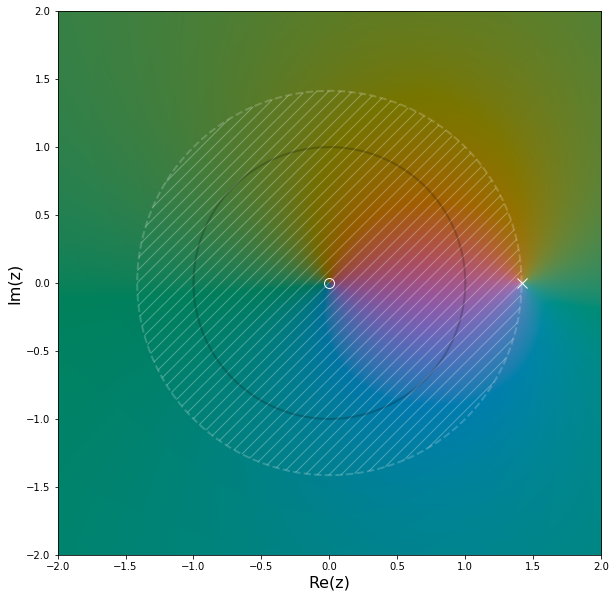

In [153]:
import cplot
import numpy

z0 = np.array( [
    0.
] )

zp = np.array( [
    np.sqrt( 2. )
] )

def H(z):
    ret = z / (z - np.sqrt( 2. ))
    return ret

plt.figure( figsize = (10, 10) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.1 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )

x_unit = np.cos( omega )
y_unit = np.sin( omega )
plt.plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )

x_bd = np.sqrt(2.) * np.cos( omega )
y_bd = np.sqrt(2.) * np.sin( omega )
plt.plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.2 )

n, radii = 50, [np.sqrt(2.)]
theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x_roc = np.outer(radii, np.cos(theta))
y_roc = np.outer(radii, np.sin(theta))

plt.fill( np.ravel( x_roc ), np.ravel( y_roc ),
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )

for cur_pole in zp:
    plt.plot( np.real( cur_pole ), np.imag( cur_zero ), 'wx',
              fillstyle = 'none',
              markersize = 10 )
    
plt.xlim( -2, 2 )
plt.ylim( -2, 2 )

plt.show()


Note that the "dividing line" between this region of convergence and the ROC for the previoius example is the *pole* at $z = \sqrt{2}$; indeed, because the $z$-transform cannot converge at a pole, it makes sense that this would delineate the boundary of two different regions of convergence.

<a id="transform_pairs"></a>
***

### Transform pairs

While we've discussed the $z$ and Laplace transforms in the context of an LTI system $T$, recall that the behavior of an LTI system is completely dependent on that system's *impulse response* $h$; indeed, the definitions for the $z$ transform:

$$ H(z) = \sum_{k=-\infty}^\infty h(k)\,z^{-k} $$

and for the Laplace transform:

$$ H(s) = \int_{-\infty}^\infty h(t)\,\mathrm{e}^{-s\,t}\,,\mathrm{d}t $$

make no use of any aspect of the underlying system $T$ *except* for the impulse response. Because of this, we may meaningfully speak of the $z$ or Laplace transform outside of the context of an LTI system, and instead speak just of the $z$ transform of *a signal*, or the Laplace transform of *a signal*.

Signals and transforms form **transform pairs**, with each signal having its own unique transform—as long as that transform is considered *along with the respective region of convergence*. From our examples above, both of which had a $z$-transform specified by $H(z) = \frac{z}{z-\sqrt{2}}$, the particular ROC under consideration determined which system (or signal) matched with a given transform.

In fact, taking this notion one step further, we might consider the $z$ and Laplace transforms as *themselves* functions, taking a signal (or, equivalently, impulse response of a system) to its transform, another function from $\mathbb{C}\to\mathbb{C}$; that is, we might consider the $z$ and Laplace transforms, respectively, as

$$ \mathcal{Z},\mathcal{L}: x \mapsto X $$

where $x$ is the original signal and $X$ is the respective transform.

<a id="232"></a>
***
## 2.3.2. Properties of the $z$ and Laplace transforms

We've started building an intuition for what these transforms "look like"; now, let's see what we can do with them.

<a id="linearity"></a>
***

### Linearity

We'll start off by seeing how these transforms respect two of the critical structures of LTI systems. First is *linearity*—that is, respecting the underlying *vector space* structure of signals. As it happens, both the $z$ and Laplace transforms are **linear transforms**, meaning that, for $\mathcal{X}$ standing in for either $\mathcal{Z}$ or $\mathcal{L}$, and for $a,b$ scalars and $x_1, x_2$ signals,

$$ \mathcal{X}(a x_1 + b x_2) = a \mathcal{X}(x_1) + b \mathcal{X}(x_2) $$

##### **Proof** (Discrete case)

This fundamentally follows from the lineaarity of summation. Let $a, b \in \mathbb{R}$ be scalars and $x_1, x_2$ be discrete signals. Then, by definition, the $z$-transform of their linear combination is given by

$$
\begin{eqnarray*}
    \mathcal{Z}(a x_1 + b x_2) & = & \sum_{k = -\infty}^\infty (a x_1(k) + b x_2(k))\,z^{-k} \\
     & = & \sum_{k = -\infty}^\infty \left(a x_1(k)\,z^{-k} + b x_2(k)\,z^{-k}\right) \\
     & = & a \sum_{k=-\infty}^\infty x_1(k)\,z^{-k} + b \sum_{k=-\infty}^\infty x_2(k)\,z^{-k} \\
     & = & a \mathcal{Z}(x_1) + b\mathcal{Z}(x_2)
\end{eqnarray*}
$$

##### **Proof** (Continuous case)

Like the discrete case above, this follows from the linearity of the integral.

**TODO: Proof**

<a id="translation"></a>
***

### Translation

The next big question we might ask, given how important translation is for LTI systems, is how these transforms respect translation. While the $z$ and Laplace transform are not "translation-invariant" in the same way that LTI systems are—after all, the inputs of transformed signals are not really comparable to the inputs of the original signals themselves—they do, as it happens, have a very well-defined behavior with respect to translation.

#### **Theorem** (Translation: $z$-transform)
> Given a signal $x$,
>
> $$ \mathcal{Z}(x(n-n_0)) = z^{-n_0}\,\mathcal{Z}(x) $$

##### **Proof**
This property fundamentally stems from the algebraic properties of the exponential. Using the definition of the $z$-transform, we note that

$$ \mathcal{Z}(x(n-n_0)) = \sum_{k=-\infty}^\infty x(k-n_0)\,z^{-k} $$

Re-indexing with $l = k-n_0$ (or $k = l + n_0$), we can rewrite this sum as

$$
\begin{eqnarray*}
    \mathcal{Z}(x(n-n_0)) & = & \sum_{l=-\infty}^\infty x(l)\,z^{-(l+n_0)} \\
     & = & \sum_{l=-\infty}^\infty \left(x(l)\,z^{-l}\right)z^{-n_0} \\
     & = & z^{-n_0} \sum_{l=-\infty}^\infty x(l)\,z^{-l} \\
     & = & z^{-n_0} \mathcal{Z}(x)
\end{eqnarray*}
$$

We have a very similar result in the continuous case:

#### **Theorem** (Translation: Laplace transform)
> Given a signal $x$,
>
> $$ \mathcal{L}(x(t-t_0)) = \mathrm{e}^{-s\,t_0}\,\mathcal{L}(x) $$

##### **Proof**
**TODO: Proof**

<a id="convolution"></a>
***

### Convolution

One of the critical operations of LTI systems is *convolution*; as we discussed in the last section, the primary operation of an LTI system is to convolve the system's input with its *impulse response*. However, this convolution is a rather expensive operation, and in general can be very difficult to compute. Fortunately, both the $z$ and Laplace transform play exceptionally nicely with convolution:

#### **Theorem** (Convolution Theorem)
> Let $\mathcal{X}$ denote either the $z$ or Laplace transform. Given two (discrete or continuous, respectively) signals $x$ and $h$, 
>
> $$ \mathcal{X}(x \ast h) = \mathcal{X}(x)\,\mathcal{X}(h) $$

##### **Proof** (Discrete case, $\mathcal{Z}$)
Let's start by combining the definition of convolution with the definition of the $z$-transform:

$$
\begin{eqnarray*}
    \mathcal{Z}(x \ast h) & = & \sum_{k=-\infty}^\infty (x \ast h)(k)\,z^{-k} \\
     & = & \sum_{k=-\infty}^\infty \sum_{l=-\infty}^\infty x(l)\,h(k-l) \,z^{-k} \\
     & = & \sum_{l=-\infty}^\infty x(l) \sum_{k=-\infty}^\infty h(k-l)\, z^{-k}
\end{eqnarray*}
$$

where the last step utilized a change in the order of summation, which we may do so long as $z$ is in the [region of convergence](https://proofwiki.org/wiki/Exchange_of_Order_of_Summation/Infinite_Series). Now, notice that the inner sum is, in fact, the $z$-transform of the time-shifted version of $h$, $h(n-l)$; from above, we know that

$$ \mathcal{Z}(h(n-l)) = z^{-l}\,\mathcal{Z}(h) $$

Letting $\mathcal{Z}(h) = H(z)$, we can thus continue our logical flow:

$$ \mathcal{Z}(x \ast h) = \sum_{l=-\infty}^\infty x(l)\,z^{-l}\,H(z) $$

Since $H(z)$ doesn't depend on $l$, we can factor it out, leaving behind precisely the $z$-transform of $x$, $\mathcal{Z}(x) = X(z)$; hence, we have

$$ \mathcal{Z}(x \ast h) = X(z)\,H(z) $$

as desired.

##### **Proof** (Continuous case, $\mathcal{L}$)
**TODO: Proof**

<a id="transfer_function"></a>
***

### The transfer function

Recall that for an LTI system $T$ with impulse response $h$, the output $y$ resulting from input $x$ is given by the convolution

$$ y = x \ast h $$

Taking the $z$-transform (or Laplace transform) of both sides, we see that 

$$ Y(z) = X(z)\,H(z)\qquad\textrm{or}\qquad Y(s) = X(s)\,H(s) $$

This gives us a very important representation of the transform of the impulse response, $H$:

$$ H(z) = \frac{Y(z)}{X(z)}\qquad\textrm{or}\qquad H(s) = \frac{Y(s)}{X(s)} $$

That is, $H$ can be seen as the **gain** or amplification made from taking $X$ to $Y$. Because of this representation, we give $H$, the transform of the impulse response $h$, a special name—the **transfer function** of the system. Don't be confused by this nomenclature switch-up, however: what we're really fundamentally talking about is the $z$-transform of the impulse response! This form, however, gives us another way to calculate this important function: if we were to somehow know the input and output transforms $X$ and $Y$, we could simply take their ratio in order to determine the system's transfer function—and hence, by inverting the transform, the impulse response itself!

<a id="problem_solving"></a>
***

### Problem-solving with transforms

The convolution theorem is an incredibly important result, as it shows sthat convolution—an operation that, on face value, requires an infinite sum (or integral) to evaluate for *each point* of the output signal—has a parallel in the transform domain that requires only *pointwise multiplication* to compute. That's quite a simplification!

**TODO: Describe the direction we're going: transform, multiply, inverse transform**

<a id="integration_differentiation"></a>
***

### Integration and differentiation

As we discussed at the end of [the last section](./book-nb-2-2-properties.ipynb), one common source of LTI systems arises from *integration* and *differentiation* (or their discrete equivalents, *accumulation* and *difference*). As it happens, these operations also have special behavior in the transform domain as well.

#### **Theorem** (Accumulation)
> Given a signal $x$, define the **accumulator** system $I$ by
>
> $$ I(x)(n) = \sum_{k=-\infty}^n x(k) $$
>
> Then,
>
> $$ \mathcal{Z}(I(x)) = \frac{1}{1-z^{-1}}\,\mathcal{Z}(x) $$

##### **Proof**
First, we note that the impulse response of $I$ is

$$ I(\delta) = \sum_{k=-\infty}^n \delta(k) = \theta(n) $$

Therefore, we may start by looking for the $z$-transform of $\theta$; the result will then follow from the convolution theorem.

Using the definition of the $z$-transform, we have

$$
\begin{eqnarray*}
    \mathcal{Z}(\theta) & = & \sum_{k=-\infty}^\infty \theta(k)\,z^{-k} \\
     & = & \sum_{k=0}^\infty z^{-k} = \sum_{k=0}^\infty \left(z^{-1}\right)^k \\
     & = & \frac{1}{1 - z^{-1}}
\end{eqnarray*}
$$

where in the last step we utilized the geometric series formula. This is precisely the **transfer function of the accumulator**. Now, using the convolution theorem, we note that

$$ \mathcal{Z}(I(x)) = \mathcal{Z}(x \ast \theta) = \mathcal{Z}(x)\,\mathcal{Z}(\theta) = \frac{1}{1-z^{-1}}\,\mathcal{Z}(x) $$

**TODO: Insight**

#### **Theorem** (Backward difference)
> Given a signal $x$, define the **backward difference** system $\Delta$ by
>
> $$ \Delta(x)(n) = x(n) - x(n-1) $$
>
> Then,
>
> $$ \mathcal{Z}(\Delta(x)) = (1 - z^{-1})\,\mathcal{Z}(x) $$

##### **Proof**
Again, we begin by noting the impulse response of $\Delta$:

$$ h_\Delta = \Delta(\delta) = \delta(n) - \delta(n-1) $$

From the translation theorem above, we recall that

$$ \mathcal{Z}(\delta(n-n_0)) = z^{-n_0} $$

In particular, we note that in the special case of $\delta(n)$, or $n_0 = 0$, this formula reduces to

$$ \mathcal{Z}(\delta) = 1 $$

Since the $z$-transform is linear, we can put these results together into one to find the transfer function of the system:

$$ \mathcal{Z}(h_\Delta) = \mathcal{Z}(\delta(n) - \delta(n-1)) = \mathcal{Z}(\delta) - \mathcal{Z}(\delta(n-1)) = 1 - z^{-1} $$

Finally, again leveraging the convolution theorem, we can use the transfer function to determine the $z$-transform of the system's output for arbitrary inputs $x$:

$$ \mathcal{Z}(\Delta(x)) = \mathcal{Z}(h_\Delta \ast x) = \mathcal{Z}(h_\Delta)\,\mathcal{Z}(x) = (1 - z^{-1})\,\mathcal{Z}(x) $$

**TODO: Insight**

#### **Theorem** (Integration)
> Given a continuous signal $x$, define the **integrator** system $I$ by
>
> $$ I(x)(t) = \int_0^t x(\tau)\,\mathrm{d}\tau $$
>
> Then,
>
> $$ \mathcal{L}(I(x)) = \frac{X(s)}{s} $$

##### **Proof**
**TODO: Proof**

**TODO: Insight**

#### **Theorem** (Differentiation)
> Given a continuous signal $x$, define the **differentiator** system $D$ by
>
> $$ D(x)(t) = x'(t) $$
>
> Then,
>
> $$ \mathcal{L}(D(x)) = s\,X(s) $$

##### **Proof**
**TODO: Proof**

**TODO: Insight**

<a id="inversion"></a>
***

### Inversion

Above we noted a few particular transforms of important systems. In the discrete domain, for example, we showed that an accumulated signal $x$ has $z$-transform

$$ \mathcal{Z}(I(x)) = \frac{1}{1-z^{-1}}\,X(z) $$

Noting that the impulse response of $I$ is $\theta$, and that we therefore know that $\mathcal{Z}(I(x)) = \mathcal{Z}(\theta \ast x)$, we therefore infer that

$$ \mathcal{Z}(\theta) = \frac{1}{1-z^{-1}} $$

Similarly, for the backward difference system $\Delta$, we note that the system's $z$-transform is 

$$ \mathcal{Z}(\Delta) = \mathcal{Z}(\delta - \delta(n-1)) = 1 - z^{-1} $$

These two $z$-transforms have a very special relationship, namely

$$ \mathcal{Z}(\Delta)\,\mathcal{Z}(\theta) = (1-z^{-1})\,\frac{1}{1-z^{-1}} = 1 $$

Aha! So we see that these two systems have **reciprocal** $z$-transforms! As it happens, this has an even deeper meaning for these two systems—for indeed, if we invert the $z$-transform on both sides, noting that multipliccation in the $z$-domain corresponds to convolution in the original domain, we find that

$$ \Delta \ast \theta = \mathcal{Z}^{-1}(1) = \delta $$

We can validate this from the definition of the two systems by noting that

$$
\begin{eqnarray*}
    \Delta \ast \theta & = & (\delta(n) - \delta(n-1)) \ast \theta \\
     & = & (\delta(n) \ast \theta) - (\delta(n-1) \ast \theta) \\
     & = & \theta(n) - \theta(n-1) \\
     & = & \delta
\end{eqnarray*}
$$

But what does this tell us? Well recall from the last section that when two systems' impulse responses satisfy

$$ a \ast b = \delta $$

we call them **inverse systems**, and we call the impulse responses of the two systems $a$ and $b$ **inverse elements** to one another. So we see that there is a very strong relationship between the algebra of convolution in the original domain, and the algebra of functions in the transform domain; namely, we have the relationship that

$$ a \ast b = \delta \xrightarrow{\mathcal{Z}} A\,B = 1 $$

Hence, we see that **inverse systems** have **reciprocal transforms**!

<a id="finite"></a>
***

### Finite signals

Causal signals, as we saw in the last section, are important from a practical design perspective—indeed, it is quite difficult to realize a non-causal system in most real-time applications because physics is ([generally](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.46.603)) causal. Here we will see that *causality* of a system has a correlate in the transform domain.

First, it will be useful to break up signals by *how long they last*. For example, take the $N$-sample moving average system, which has an impulse response of

$$ h_{\mathrm{MA}(N)}(n) = \frac{1}{N} \sum_{k=0}^{N-1} \delta(n-k) = \frac{1}{N}\left(\theta(n) - \theta(n - N)\right) $$

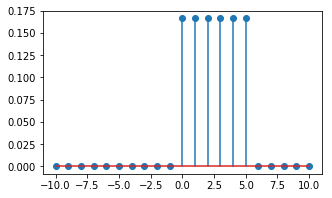

In [158]:
import numpy as np
import matplotlib.pyplot as plt

N = 6

n_all = np.arange( -10, 11 )
h = np.zeros( n_all.shape )
h[(n_all >= 0) & (n_all < N)] = 1. / N

plt.figure( figsize = (5, 3) )
plt.stem( n_all, h )
plt.show()

As we can see, this system's impulse response is only nonzero for a finite number ($6$) samples. In contrast, we can look at the damped sinusoid defined by

$$ h_\mathrm{damp}(n) = \left(\frac{19}{20}\right)^n\,\cos\left(\frac{n}{4}\right)\,\theta(n) $$

(We note here that the first term is responsible for the damping, the middle term is providing the oscillation, and the final term gates the signal so that it is zero to the left of the origin, as can be seen below:)

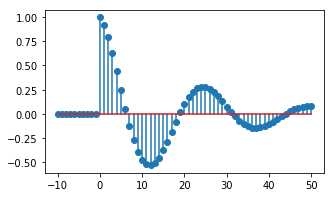

In [176]:
import numpy as np
import matplotlib.pyplot as plt

n_all = np.arange( -10, 51 )
h = np.zeros( n_all.shape )
h[n_all >= 0] = np.power( 19. / 20., n_all[n_all >= 0] ) * np.cos( n_all[n_all >= 0] / 4. )

plt.figure( figsize = (5, 3) )
plt.stem( n_all, h )
plt.show()

This signal is nonzero for all $n \geq 0$, as we can see by looking at each term individually: $\left(\frac{19}{20}\right)^n$ is greater than $0$ for all $n$, because if this product were $0$, it would imply (by the [zero product property](https://en.wikipedia.org/wiki/Zero-product_property)) that $\frac{19}{20} = 0$, which is not true. $\cos(\frac{n}{4})$ is nonzero for all $n$, because $\cos(\theta)$ is zero precisely when $\theta = \pi\left(k+\frac{1}{2}\right)$ for some $k \in \mathbb{Z}$; because these values are *irrational*, and $n/4$ is *rational* for all $n$, $\cos\left(\frac{n}{4}\right)$ cannot be exactly zero (although it does come [arbitrarily close to zero](https://math.stackexchange.com/questions/656930/show-that-a-set-is-dense-in-1-1)). Since $\theta(n)$ is nonzero for all $n \geq 0$, we see our desired conclusion, that $h_\textrm{damp}$ is nonzero for all $n \geq 0$.

These two signals give us a good depiction of the difference between a **finite** and an **infinite** duration signal—namely, that *finite*-duration signals have a *finite* amount of input-space (which can be, for example, the number of input samples for discrete signals, or the "length" or "duration" of input space for continuous signals) in which the signal carries data. As it happens, this distinction actually carries weight in the transform domain.

Let $x$ be a discrete finite signal. Then, in particular, we know that there is some $n_1$ such that $x(n) = 0$ for all $n < n_1$ (to enforce finiteness on the *left* side), and also that there is a $n_2$ such that $x(n) = 0$ for all $n > n_2$ (for the *right* side). This means that our $z$-transform of $x$ takes the form of a finite sum on the samples $n_1 \leq k \leq n_2$:

$$ X(z) = \sum_{k=-\infty}^\infty x(k)\,z^{-k} = x(n_1)\,z^{-n_1} + \ldots + x(n_2)\,z^{-n_2} $$

Now, let's look at this sum from the perspective of *convergence*. When do we run into problems? Well, if $n_2 > 0$, then this sum includes $z^{-k}$ terms, which means that $X(z)$ will have a **pole at $0$**. Similarly, if $n_1 < 0$, then this sum includes $z^k$ terms, which implies that $X(z)$ has a **pole at $\infty$**. These, however, are the only two possibilities for a discrete finite signal:

#### **Lemma**
> Let $x$ be a discrete finite signal. Then the ROC of $\mathcal{Z}(x)$ is the entire complex plane, with the possible exception of $0$ or $\infty$.

In fact, we have a very special case of this that is directly implied from our derivation above:

#### **Corollary**
> Let $T$ be a discrete memoryless LTI system with impulse response $h = c\,\delta$. Then the ROC of $\mathcal{Z}(h)$ is the entire complex plane, $\mathbb{C}$.

(This follows by recognizing memorylessness as the special case where $n_1 = n_2 = 0$.)

We, in fact, saw this above with the Spencer smoother's $z$-transform; recall that that system had a pole at the origin (as well as a few scattered zeros). We can investigate it with another example, the causal moving average system from above:

$$
\begin{eqnarray*}
    H_{\mathrm{MA}(N)}(z) & = & \sum_{k=-\infty}^\infty h_{\mathrm{MA}(N)}(k)\,z^{-k} \\
     & = & \sum_{k=-\infty}^\infty \frac{1}{N}\,\theta(k)\,\theta(k-N)\,z^{-k} \\
     & = & \frac{1}{N}\,\sum_{k=0}^N\,z^{-k} 
\end{eqnarray*}
$$

(Once again, we can use [computer algebra](https://www.wolframalpha.com/input/?i=zeros+of+%281%2Fn%29*%281%2Bz%5E%28-1%29+%2B+z%5E%28-2%29+%2B+z%5E%28-3%29+%2B+z%5E%28-4%29+%2B+z%5E%28-5%29%29) to determine the zeros.)

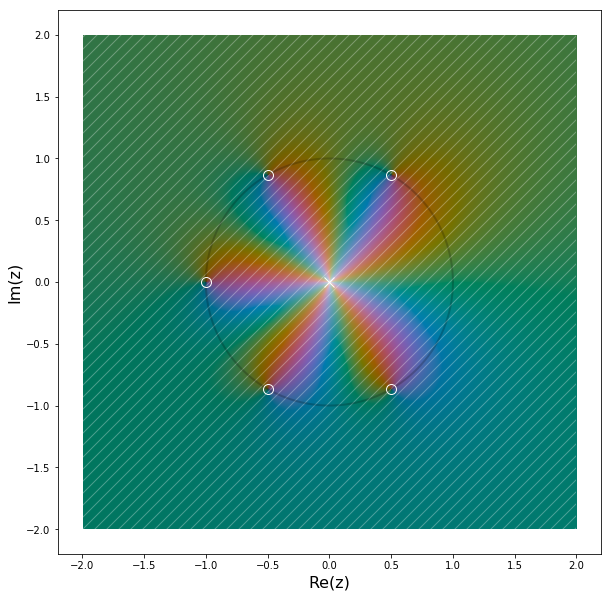

In [175]:
import cplot
import numpy

z0 = np.array( [
    -1.,
    np.power( -1. + 0.j, 1./3 ),
    -1. * np.power( -1. + 0.j, 1./3 ),
    np.power( -1. + 0.j, 2./3 ),
    -1. * np.power( -1. + 0.j, 2./3 )
] )
zp = np.array( [
    0.
] )

N = 6

def H(z):
    ret = complex( 0. )
    for k in range( N ):
        ret += (1. / N) * np.power( z, -k )
    return ret

plt.figure( figsize = (10, 10) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.1 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )

plt.plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    plt.plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )
    
x_roc = np.array( [-2, 2, 2, -2, -2] )
y_roc = np.array( [2, 2, -2, -2, 2] )

plt.fill( x_roc, y_roc,
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )


Note the single pole at the origin, as well as the five zeros on the unit circle surrounding it. Hence, the region of convergence for the moving average system is $|z| > 0$.

<a id="right_sided"></a>
***

### Right-sided, exponentially bounded signals

Infinite signals can also be classified by *what direction* the infinite data runs in. Take, for example, the damped oscillation $h_\textrm{damp}$ shown above, reproduced below:

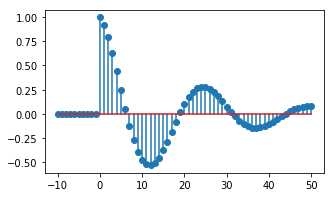

In [177]:
import numpy as np
import matplotlib.pyplot as plt

n_all = np.arange( -10, 51 )
h = np.zeros( n_all.shape )
h[n_all >= 0] = np.power( 19. / 20., n_all[n_all >= 0] ) * np.cos( n_all[n_all >= 0] / 4. )

plt.figure( figsize = (5, 3) )
plt.stem( n_all, h )
plt.show()

This signal continues to have nonzero values forever as $n \to \infty$; however, note that there is a value $n_0$ (here, $n_0 = 0$) such that $h_\textrm{damp}(n) = 0$ for all $n < n_0$; that is, the signal *stops* at some point as we go to the left. We call this kind of signal **right-sided** (and note the analogous definition of **left-sided**):

#### **Definition** (Right-sided, Left-sided)
> A (discrete or continuous) signal $x$ is called **right-sided** if there exists an $a_0$ (in $\mathbb{Z}$ or $\mathbb{R}$, respectively) such that
>
> $$ x(a) = 0 \quad \forall a < a_0 $$
>
> Similarly, a signal $x$ is called **left-sided** if there exists an $a_0$ such that
>
> $$ x(a) = 0 \quad \forall a > a_0 $$

A signal is **two-sidied** if the signal does not "stop" going in either direction.

Equipped with this classification, let's see if we can uncover any insights about the region of convergence based on these properties. We note that $z$ is in the ROC of $X(z)$ if the $z$-transform converges. To this end, above we utilized the important fact that *absolute* convergence of a sum of complex numbers implies *overall* convergence; hence, we are pointed in the direction of investigating

$$ \sum_{k=-\infty}^\infty \left|x(k)\,z^{-k}\right| = \sum_{k=-\infty}^\infty \left|x(k)\right|\,\left|\frac{1}{z}\right|^k $$

Motivated by our classification of infinite signals by "sidedness", we can split this sum into two halves—left and right—defined by

$$
\begin{eqnarray*}
    L_\textrm{right} & = & \sum_{k=0}^\infty \left|x(k)\right|\,\left|\frac{1}{z}\right|^k \\
    L_\textrm{left} & = & \sum_{k=-\infty}^{-1} \left|x(k)\right|\,\left|\frac{1}{z}\right|^k \\
\end{eqnarray*}
$$

Now, suppose first that we have a *right-sided* discrete signal $x$. Then we note that $L_\textrm{left}$ has a finite number of terms, and therefore always converges (with the possible exception of $z \to \infty$, as this sum may contain some $z^k$ terms). When examining $L_\textrm{right}$, it seems generally unclear what behavior this will have with respect to convergence. However, placing some additional restrictions on our signal $x$, we will see that the "shape" of the signal and the "shape" of the signal's ROC are intricately linked.

Recall from the previous section that a discrete signal $x$ is **bounded** if, for all $n$, $|x(n)| \leq B$ for some $B \in \mathbb{R}$. We can think of this even more generally, however, if we view $B$ not as a constant value, but instead as a *function* itself. For example, the damped oscillation above $h_\textrm{damp}$ can be seen as being bounded by the decaying exponential $\left(\frac{19}{20}\right)^n$:

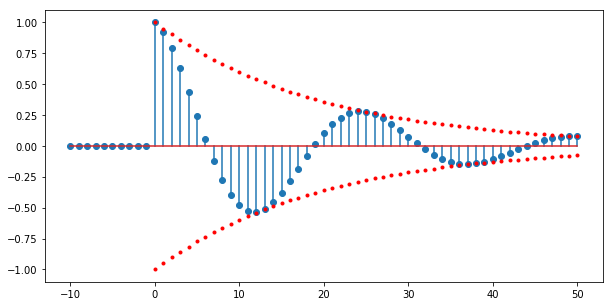

In [183]:
import numpy as np
import matplotlib.pyplot as plt

n_all = np.arange( -10, 51 )
h = np.zeros( n_all.shape )
B = np.zeros( n_all.shape )
h[n_all >= 0] = np.power( 19. / 20., n_all[n_all >= 0] ) * np.cos( n_all[n_all >= 0] / 4. )
B[n_all >= 0] = np.power( 19./ 20., n_all[n_all >= 0] )

plt.figure( figsize = (10, 5) )
plt.stem( n_all, h )
plt.plot( n_all[n_all >= 0], B[n_all >= 0], 'r.' )
plt.plot( n_all[n_all >= 0], -B[n_all >= 0], 'r.' )
plt.show()

This gives us a generalization of boundedness which we will see is quite useful:

#### **Definition** (Exponentially bounded)
> A discrete signal $x$ is said to be **exponentially bounded** if there are constants $C, r > 0$ such that
>
> $$ |x(n)| \leq C\,r^n \quad \forall n > n_0 $$
>
> for some starting point $n_0$.
>
> A continuous signal $x$ is said to be **exponentially bounded** if there are constants $k \in \mathbb{R}, C > 0$ such that
>
> $$ |x(t)| \leq C\,\mathrm{e}^{k\,t} \quad \forall t >  t_0 $$
>
> for some starting point $t_0$.

Exponential boundedness gives us a "speed limit" on a signal's dynamics: that is, an exponentially bounded signal can always be "reined in" by taking a ratio with another complex exponential with appropriate parameters, as we will see in the derivation below.

Let's return to our *right-sided* discrete signal $x$. As we've seen above, the convergence of this signal is dependent on the *right*-sided sum

$$ L_\textrm{right} = \sum_{k=0}^\infty |x(k)|\,\left|\frac{1}{z}\right|^k $$

Suppose, now, that $x$ is *exponentially bounded*, as we've just defined. Then we must have that, for some beginning point $n_0$, and for some scaling factor $C$ and exponential base $r$,

$$
\begin{eqnarray*}
    \sum_{k=0}^\infty |x(k)|\,\left|\frac{1}{z}\right|^k & \leq & \underbrace{\sum_{k=0}^{n_0} |x(k)|\,\left|\frac{1}{z}\right|^k}_{S_{n_0}} + \sum_{k=n_0}^\infty C\,r^k\,\left|\frac{1}{z}\right|^k \\
     & = & S_{n_0} + C \sum_{k=n_0}^\infty \left(\frac{r}{|z|}\right)^k \\
     & \leq & S_{n_0} + C \sum_{k=0}^\infty \left(\frac{r}{|z|}\right)^k
\end{eqnarray*}
$$

where $S_{n_0}$ is the sum of the first terms up to $n_0$ when the exponential bound takes over; this term is always finite, with the possible exception of $z = 0$ (when $n_0 > 0$, and so the sum contains $z^{-1}$ and lower terms). The latter sum term, however, is now in the form of a geometric series; and, in parallel with what we've seen previously with geometric series in $z$-transforms, the series here converges whenever

$$ \frac{r}{|z|} < 1 \Leftrightarrow |z| > r $$

Now *this* is interesting! A **dynamical** property of the signal $x$—namely, the rate constant that defines its exponential-order rise/decay—is now related to a **geometric** property of $x$'s $z$-transform—namely, the shape of its region of convergence.

#### **Lemma**
> Let $x$ be a discrete signal that is (1) right-sided and (2) exponentially bounded by $C\,r^n$. Then, the ROC of $\mathcal{Z}(x)$ includes $|z| > r$, with the possible exception of $z = \infty$.

(The issue at $z = \infty$ arises because our discussion above only included the *right-sided* sum $L_\textrm{right}$; if $x$ is right-sided but includes terms for *negative $n$*, then these terms will contribute $z^1$, $z^2$, and so on terms to the $z$-transform, which will result in a pole at $\infty$.)

We can even animate this correspondence, just to drive it home!

<a id="example_exponential_boundedness_roc"></a>
***

#### **Example**: Exponential boundedness and the ROC

Let's generalize our damped oscillation $h_\textrm{damp}$—which as we've already seen is an exponentially bounded right-sided signal—to have an arbitrary damping parameter $r > 0$, rather than the original $\frac{19}{20}$:

$$ h_\textrm{damp}(n) = r^n\,\cos\left(\frac{n}{4}\right)\,\theta(n) $$

We can rewrite this using Euler's identity:

$$
\begin{eqnarray*}
    h_\textrm{damp}(n) & = & r^n\,\frac{1}{2}\left(\mathrm{e}^{\mathrm{i}\frac{n}{4}} + \mathrm{e}^{-\mathrm{i}\frac{n}{4}}\right)\,\theta(n) \\
     & = & \frac{1}{2}\,\left(r\,\mathrm{e}^{\mathrm{i}/4}\right)^n\,\theta(n) + \frac{1}{2}\,\left(r\,\mathrm{e}^{-\mathrm{i}/4}\right)^n\,\theta(n)
\end{eqnarray*}
$$

Thus we've separated the "positive" and "negative" frequency components of our signal. This is convenient for the purposes of taking the signall's $z$-transform $H_\textrm{damp}(z)$, because of the transform's *linearity*:

$$
\begin{eqnarray*}
    H_\textrm{damp}(z) & = & \frac{1}{2}\,\sum_{k=-\infty}^\infty \left(r\,\mathrm{e}^{\mathrm{i}/4}\right)^k\,\theta(k)\,z^{-k} + \frac{1}{2}\, \sum_{k=-\infty}^\infty \left(r\,\mathrm{e}^{-\mathrm{i}/4}\right)^k\,\theta(k)\,z^{-k} \\
     & = & \frac{1}{2}\,\sum_{k=0}^\infty \left(\frac{r\,\mathrm{e}^{\mathrm{i}/4}}{z}\right)^k + \frac{1}{2}\,\sum_{k=0}^\infty \left(\frac{r\,\mathrm{e}^{-\mathrm{i}/4}}{z}\right)^k
\end{eqnarray*}
$$

Similar to examples we've seen previously, these two geometric series converge when

$$\left|\frac{r\,\mathrm{e}^{\mathrm{i}/4}}{z}\right| < 1 \quad \textrm{and} \quad \left|\frac{r\,\mathrm{e}^{-\mathrm{i}/4}}{z}\right| < 1 $$

respectively; hence, $H_\textrm{damp}$ converges when **both** are true simultaneously (as both sums must conveerge for $H_\textrm{damp}$ to converge). However, note that, since $\left|\mathrm{e}^{\mathrm{i}/4}\right| = \left|\mathrm{e}^{-\mathrm{i}/4}\right| = 1$, the criterion above occurs for both precisely when $|z| > r$, as we would expect from our results on $h_\textrm{damp}$'s exponential boundedness.

Within the ROC, we use the geometric series summation formula to obtain

$$
\begin{eqnarray*}
    H_\textrm{damp}(z) & = & \frac{1/2}{1 - \frac{r\,\mathrm{e}^{\mathrm{i}/4}}{z}} + \frac{1/2}{1 - \frac{r\,\mathrm{e}^{-\mathrm{i}/4}}{z}} \\
     & = & \frac{1/2\,z}{z-r\,\mathrm{e}^{\mathrm{i}/4}} + \frac{1/2\,z}{z-r\,\mathrm{e}^{-\mathrm{i}/4}} \\
     & = & \frac{z\,\left(z-r\left(\frac{\mathrm{e}^{\mathrm{i}/4}+\mathrm{e}^{-\mathrm{i}/4}}{2}\right)\right)}{(z-r\,\mathrm{e}^{\mathrm{i}/4})\,(z-r\,\mathrm{e}^{-\mathrm{i}/4})}
\end{eqnarray*}
$$

Hence, we see that $H_\textrm{damp}$ has two poles—at $r\,\mathrm{e}^{\pm\mathrm{i}/4}$, conveniently in polar notation—and two zeros, at $0$ and $r\,\left(\frac{\mathrm{e}^{\mathrm{i}/4}+\mathrm{e}^{-\mathrm{i}/4}}{2}\right)$.

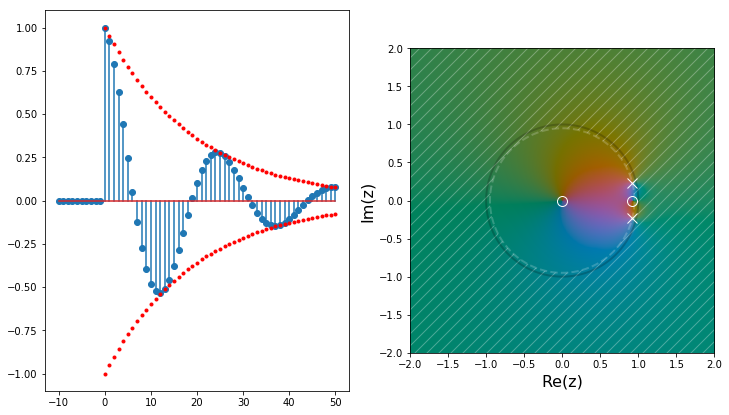

In [587]:
import cplot
import numpy
import numpy as np
import matplotlib.pyplot as plt

r = 19./20

z0 = np.array( [
    0.,
    (r / 2.) * (np.exp(1.j/4) + np.exp(-1.j/4))
] )
zp = np.array( [
    r * np.exp(1.j/4),
    r * np.exp(-1.j/4),
] )

def H(z):
    num = z * (z - (r/2.) * (np.exp(1.j/4) + np.exp(-1.j/4)))
    den = (z - r * np.exp(1.j/4)) * (z - r * np.exp(-1.j/4))
    return num / den

fig, axs = plt.subplots( 1, 2, figsize = (12, 7) )

## 

n_all = np.arange( -10, 51 )
h = np.zeros( n_all.shape )
B = np.zeros( n_all.shape )
h[n_all >= 0] = np.power( r, n_all[n_all >= 0] ) * np.cos( n_all[n_all >= 0] / 4. )
B[n_all >= 0] = np.power( r, n_all[n_all >= 0] )

axs[0].stem( n_all, h )
axs[0].plot( n_all[n_all >= 0], B[n_all >= 0], 'r.' )
axs[0].plot( n_all[n_all >= 0], -B[n_all >= 0], 'r.' )

##

axs[1].set_xlabel( 'Re(z)', fontsize = 16 )
axs[1].set_ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.1 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )

axs[1].plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )

for cur_zero in z0:
    axs[1].plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    axs[1].plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )
    
n, radii = 50, [r, 4.]
x_bd = r * np.cos( omega )
y_bd = r * np.sin( omega )
axs[1].plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.2 )

theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x_roc = np.outer(radii, np.cos(theta))
y_roc = np.outer(radii, np.sin(theta))
x_roc[1,:] = x_roc[1,::-1]
y_roc[1,:] = y_roc[1,::-1]

axs[1].fill( np.ravel( x_roc ), np.ravel( y_roc ),
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

axs[1].set_xlim( -2, 2 )
axs[1].set_ylim( -2, 2 )

plt.show()


**TODO: Add animation to this figure**

***

**TODO:**

**Left-sided**

**Two-sided**

**Causal**

<a id="stability"></a>
***

### Stability

In the previous section, we talked about the notion of **bounded-input bounded-output (BIBO) stability**—a very important definition for real-world systems! By way of reminder, a system $T$ is BIBO stable if for every bounded signal $x$, $T(x)$ is also bounded. As we saw in that section, for LTI systems, there is a very nice criterion for determining this property from the system's impulse response: an LTI system $T$ is BIBO stable if its impulse response is **absolutely summable** (in the discrete case) or **absolutely integrable** (in the continuous case). Taking a deeper look for a moment at the discrete case, this means in particular that, for the impulse response $h$,

$$ \sum_{k=-\infty}^\infty |h(k)| = \|h\|_1 < \infty $$

However, looking with new eyes, we notice that this sum is actually very close to a $z$-transform; indeed, in the instances where we have been looking at the region of convergence above, we have *also* been quite keen on examining the absolute summability of sums of the form

$$ \sum_{k=-\infty}^\infty \left|h(k)\,z^{-k}\right| $$

Notice, however, that there are very special values of $z$ for which $|z| = 1$, namely those values on the unit circle, $\mathrm{e}^{\mathrm{i}\omega}$, $\omega \in [0, 2\pi)$. Suppose, then, that we were to know *a priori* that a system's $z$-transform $H(z)$ **converges on the unit circle**; then, we *also* know that the sum

$$ \sum_{k=-\infty}^\infty \left|h(k)\,\mathrm{e}^{\mathrm{i}\omega}\right| = \sum_{k=-\infty}^\infty |h(k)|\,\left|\mathrm{e}^{\mathrm{i}\omega}\right| = \sum_{k=-\infty}^\infty |h(k)|\cdot 1 = \sum_{k=-\infty}^\infty |h(k)| $$

must converge too! Since the convergence of this latter sum implies that our system under study is BIBO stable, as we just noted above, we arrive at the following wonderful conclusion:

#### **Theorem**
> A system $T$ with $z$-transform $H$ is *BIBO stable* if $H$'s ROC includes the unit circle.

To see this in action, let's take our example of a damped oscillator above. In the animation, we saw that as we changed the damping factor $r$ from values less than $1$ to greater than $1$, the pole of the system moved from inside the unit circle to outside the unit circle, and the corresponding ROC went from *including* the unit circle (for $r < 1$) to *not including* the unit circle (for $r \geq 1$). This makes sense when looking at the trace of the impulse response for these cases: when $r < 1$, the oscillation is *damped*, such that it decays to zero; however, when $r > 1$, the oscillation "blows up" and runs away to infinity. Now, we know how this relates to the system's behavior on inputs: because the ROC includes the unit circle for $r < 1$, we know that these versions of the system are *BIBO stable*. In contrast, because the unit circle is *not* in the ROC for values of $r \geq 1$, we know that these versions of the system are *not* BIBO stable!

<a id="diff_eq"></a>
***

### Linear difference equations

In the last section, we briefly explored systems $T:x\mapsto y$ defined by **linear difference equations** of the form

$$ P(D_1)\,y = Q(D_1)\,x $$

where $P$ and $Q$ are polynomials, and $D_1$ is the unit delay operator. Let's now take a look at how these systems behave in the **transform domain**.

If we make the assumption that this system has zero initial conditions, then, as we showed in the last section, we know that $T$ is *LTI*; thus, we may describe the system's behavior by its *$z$-transform*. First, we note that

$$\mathcal{Z}(D_1^k\,y) = \mathcal{Z}(D_k(y)) = \mathcal{Z}(\delta(n-k) \ast y) = z^{-k}\,Y(z) $$

Expanding our polynomials and taking the transform of both sides, we have:

$$
\begin{eqnarray*}
    \sum_{k=0}^N a_k\,D_1^k\,y & = & \sum_{k=0}^M b_k\,D_1^k\,x \\
    (\mathcal{Z})\quad \sum_{k=0}^N a_k\,z^{-k}\,Y(z) & = & \sum_{k=0}^M b_k\,z^{-k}\,X(z) \\
    Y(z) & = & \frac{\sum_{k=0}^M b_k\,z^{-k}}{\sum_{k=0}^N a_k\,z^{-k}}\,X(z) \\
     & = & \frac{Q(z^{-1})}{P(z^{-1})}\,X(z)
\end{eqnarray*}
$$

where $P(z^{-1})$ and $Q(z^{-1})$ are precisely the same polynomials as used in the defining equation, but with powers of $z^{-1}$ substituted instead of replicates of $D_1$. This makes evident the **transfer function** of the system, which is precisely

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{Q(z^{-1})}{P(z^{-1})} $$

We call transfer functions of this form—which are *rational* functions of $z$ or $s$—**rational transfer functions**. These systems are the building blocks of the systems used in many practical applications, because they have advantageous properties for computation—indeed, we have already seen that the difference equation itself can serve as a useful template for computing the output of these systems.

Each of the numberator $Q$ and the denominator $P$ can be *factored*, and factors that appear in both polynomials can be *canceled*, yielding a *reduced form* of the transfer function. In this reduced form, we note that the transfer function can be represented as

$$ H(z) = \frac{(z - z_1)(z - z_2)\cdots(z - z_{M'})}{(z - p_1)(z - p_2)\cdots(z - p_{N'})} $$

Here, the $z_k$ (roots) in the numerator are the **zeros** of the transfer function, and the $p_k$ (roots) in the denominator are the **poles** of the system.

Notice that the *root equation* for the denominator of the transfer function is precisely the **characteristic equation** from the last section:

$$ P(z^{-1}) = \sum_{k=0}^N a_k\,z^{-k} = 0 $$

Hence, we see that the *poles* of the transfer function are precisely the *zeros* of the characteristic equation. Recall that, in the absence of input, the behavior of a system described by a linear difference equation is given by a linear combination of complex exponentials

$$ y_h(n) = c_1\,p_1^n + c_2\,p_2^n + \ldots + c_{N'}\,p_{N'}^n $$

In that section, we talked about the exponential bases as being determined by the rootst of the characteristic equation; however, now we see that these are precisely equivalent to the poles of the system's transfer function. This gives us two pieces of information. First, the system's poles give us the natural **dynamical modes** of the system in the absence of driving input. Second, this tells us that the *long-term behavior* of systems with a *rational transfer function* is governed by the *pole with the largest absolute value*. As we discussed in the last section, for large $n$, the expression for $y_h$ above will become dominated by the term with the largest $|p_k|$.

<a id="example_rational_tf"></a>
***

#### **Example**: A rational transfer function

Let's consider the system defined by the (admittedly opaque-looking) difference equation

$$ a_0\,y(n) + a_1\,y(n-1) + a_2\,y(n-2) + a_3\,y(n-3) + a_4\,y(n-4) = b_0\,x(n) + b_1\,x(n-1) + b_2\,x(n-2) + b_3\,x(n-3) $$

where

$$
\begin{eqnarray*}
    a_0 & = & 1 \\
    a_1 & = & - \left(\frac{\mathrm{e}^{\mathrm{i}/3} + \mathrm{e}^{-\mathrm{i}/3}}{2} + \frac{9}{10}\right) \\
    a_2 & = & \left(\frac{3\,\left(\mathrm{e}^{\mathrm{i}/3} + \mathrm{e}^{-\mathrm{i}/3}\right)}{20} + \frac{11}{10}\right) \\
    a_3 & = & - \left(\frac{\mathrm{e}^{\mathrm{i}/3} + \mathrm{e}^{-\mathrm{i}/3}}{25} + \frac{9}{40}\right) \\
    a_4 & = & \frac{1}{50}
\end{eqnarray*}
$$

and

$$
\begin{eqnarray*}
    b_0 & = & 1 \\
    b_1 & = & - \frac{1}{10} \\
    b_2 & = & 1 \\
    b_3 & = & - \frac{1}{10}
\end{eqnarray*}
$$

This may look atrocious, but fear not! We have the tools to analyze this system! First, we'll begin with the assumption that the system has *zero initial conditions*, and is therefore LTI and causal. In particular, we can use the difference equation to determine the impulse response to this system, by replacing the input $x$ with a unit impulse $\delta$:

$$ h(n) = \frac{1}{a_0}\left(-a_1\,h(n-1) - a_2\,h(n-2) - a_3\,h(n-3) - a_4\,h(n-4) + b_0\,\delta(n) + b_1\,\delta(n-1) + b_2\,\delta(n-2) + b_3\,\delta(n-3)\right) $$

Let's see what this looks like:

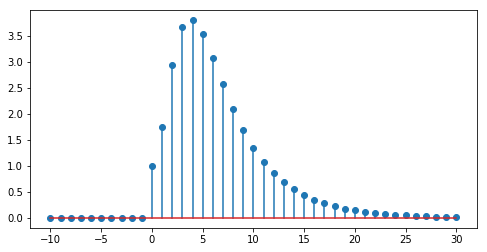

In [44]:
import numpy as np
import matplotlib.pyplot as plt

e0 = np.real( np.exp( 1.j / 3. ) + np.exp( -1.j / 3. ) )
a = np.array( [
    1.,
    -( (e0 / 2.) + (9. / 10.) ),
    (9 * e0 / 20.) + (33. / 100.),
    -( (e0 / 25.) + (9. / 40.) ),
    1. / 50.
] )
b = np.array( [1., -1./10., 1. -1./10.] )

n_all = np.arange( -10, 31 )

x = np.zeros( n_all.shape )
x[n_all == 0] = 1.

y = np.zeros( n_all.shape )
for n in range( len( a ) - 1, len( n_all ) ):
    y[n] = (1./a[0]) * ( sum( [ -a[k] * y[n-k] for k in range( 1, len( a ) ) ] )
                         + sum( [ b[k] * x[n-k] for k in range( 0, len( b ) ) ] ) )

plt.figure( figsize = (8, 4) )
plt.stem( n_all, y )
plt.show()

Here we see the effects of more than one exponential transient: indeed, we have at least one responsible for the *rise* of the impulse response, and another responsible for the *decay*. These different transients occur as a result of the different *dynamical modes* of the system, which are themselves determined by the *roots of the characteristic equation* (or equivalently, the *poles of the transfer function*). We will uncover these shortly.

Now, what does this system look like in the $z$-domain? Well, as we discussed above, we can determine the transfer function by using the $z$-transform of the delay polynomials making up the defining equation; in this case, we let

$$
\begin{eqnarray*}
    P(D_1) & = & a_0 + a_1\,D_1 + a_2\,D_1^2 + a_3\,D_1^3 + a_4\,D_1^4 \\
    Q(D_1) & = & b_0 + b_1\,D_1 + b_2\,D_1^2 + b_3\,D_1^3
\end{eqnarray*}
$$

Then, as we saw above, our transfer function $H(z) = \frac{Y(z)}{X(z)}$ is given by

$$ H(z) = \frac{Q(z^{-1})}{P(z^{-1})} = \frac{b_0 + b_1\,z^{-1} + b_2\,z^{-2} + b_3\,z^{-3}}{a_0 + a_1\,z^{-1} + a_2\,z^{-2} + a_3\,z^{-3} + a_4\,z^{-4}} $$

recognizing that the $z$-transform of the unit delay $D_1$ is $z^{-1}$.

Now, note that the numerator and denominator can be simplified by factoring out common multiples of $z^{-1}$:

$$
\begin{eqnarray*}
    H(z) & = & \frac{b_0 + b_1\,z^{-1} + b_2\,z^{-2} + b_3\,z^{-3}}{a_0 + a_1\,z^{-1} + a_2\,z^{-2} + a_3\,z^{-3} + a_4\,z^{-4}} \\
     & = & \frac{z^{-3}\,(b_0\,z^3 + b_1\,z^2 + b_2\,z + b_3)}{z^{-4}\,(a_0\,z^4 + a_1\,z^3 + a_2\,z^2 + a_3\,z^1 + a_4)} \\
     & = & \frac{z\,(b_0\,z^3 + b_1\,z^2 + b_2\,z + b_3)}{a_0\,z^4 + a_1\,z^3 + a_2\,z^2 + a_3\,z^1 + a_4}
\end{eqnarray*}
$$

We can factor the [numerator]() and [denominator]() using computer algebra to identify the *3 zeroes* and *4 poles* of the transfer function, respectively; doing so yields a factorization of the transfer function given by:

$$ H(z) = \frac{z\,\left(z - \frac{1}{10}\right)\,(z - \mathrm{i})\,(z + \mathrm{i})}{\left(z - \frac{1}{10}\right)\,\left(z - \frac{1}{2}\mathrm{e}^{\mathrm{i}/3}\right)\,\left(z - \frac{1}{2}\mathrm{e}^{\mathrm{-i}/3}\right)\,\left(z - \frac{4}{5}\right)} $$

Here we see that the pole and zero at $z = \frac{1}{10}$ cancel each other out, and therefore do not contribute to the behavior of the system; so, our final transfer function is given by

$$ H(z) = \frac{z\,(z - \mathrm{i})\,(z + \mathrm{i})}{\left(z - \frac{1}{2}\mathrm{e}^{\mathrm{i}/3}\right)\,\left(z - \frac{1}{2}\mathrm{e}^{\mathrm{-i}/3}\right)\,\left(z - \frac{4}{5}\right)} $$

Here we see that, in its final form, the transfer function has two poles of magnitude $\frac{1}{2}$, and one of magnitude $\frac{4}{5}$, which determine the intrinsic dynamical modes. Let's take a look at what this looks like in the $z$-domain:

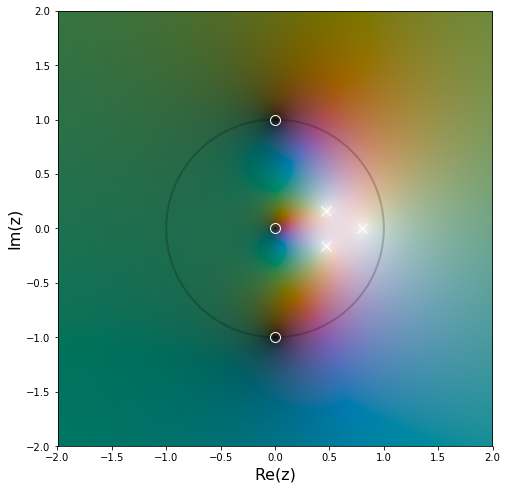

In [47]:
import numpy as np
from functools import reduce

z0 = np.array( [
    0,
    1.j,
    -1.j
] )
zp = np.array( [
    (1./2.) * np.exp( 1.j / 3. ),
    (1./2.) * np.exp( -1.j / 3. ),
    8./10.
] )

def H(z):
    num = reduce( lambda x, y: x * y, [z - x for x in z0], 1. )
    den = reduce( lambda x, y: x * y, [z - x for x in zp], 1. )
    
    return num / den

plt.figure( figsize = (8, 8) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.5 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )

plt.plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    plt.plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )

Now, the question arises: where is the ROC for our system? We can deduce this from properties we've already seen!

First of all, we know by assumption that our system is *causal*; this means that its ROC is of the form $|z| > r$ (including $z \to \infty$) for some minimum radius $r$. The question arises then: can we exponentially bound the system's impulse response $h$, determined above? Since we've seen that the impulse response is a *right-sided* signal, our theorem on right-sided signals would imply that the *base* of a boundinig exponential $C\,r^n$ would give us a suitable value for $r$!

As we discussed above, the *poles* of the transfer function determine the natural *dynamical modes* of the system; and, in particular, the *pole with the largest magnitude $|p_k|$* determines the long-term behavior of the system in the absence of input, as all of the other exponential dynamical modes fade away more quickly. Hence, it stands to reason that the **outermost pole**, in this case $\frac{4}{5}$, is the candidate we're looking for. Let's see if it seems like $\frac{4}{5}$ is the base of an exponential that bounds our system's impulse response:

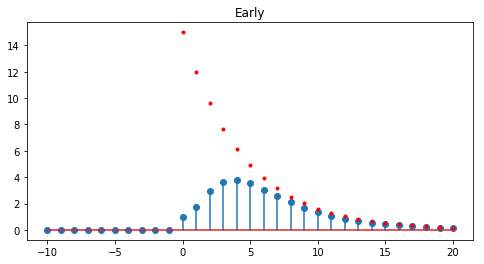

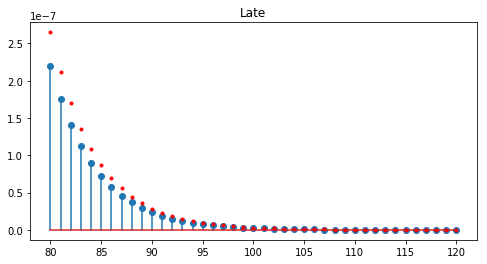

Largest pole, number below bound: 0
Less than largest pole, number below bound: 851


In [65]:
import numpy as np
import matplotlib.pyplot as plt

e0 = np.real( np.exp( 1.j / 3. ) + np.exp( -1.j / 3. ) )
a = np.array( [
    1.,
    -( (e0 / 2.) + (9. / 10.) ),
    (9 * e0 / 20.) + (33. / 100.),
    -( (e0 / 25.) + (9. / 40.) ),
    1. / 50.
] )
b = np.array( [1., -1./10., 1. -1./10.] )

n_all = np.arange( -10, 1001 )

x = np.zeros( n_all.shape )
x[n_all == 0] = 1.

y = np.zeros( n_all.shape )
for n in range( len( a ) - 1, len( n_all ) ):
    y[n] = (1./a[0]) * ( sum( [ -a[k] * y[n-k] for k in range( 1, len( a ) ) ] )
                         + sum( [ b[k] * x[n-k] for k in range( 0, len( b ) ) ] ) )

C = 15.0
r = 4./5.

bound_upper = np.zeros( n_all.shape )
bound_upper[n_all >= 0] = C * np.power( r, n_all[n_all >= 0] )
    
plt.figure( figsize = (8, 4) )
plt.stem( n_all[n_all < 21], y[n_all < 21] )
plt.plot( n_all[(n_all >= 0) & (n_all < 21)], bound_upper[(n_all >= 0) & (n_all < 21)], 'r.' )
plt.title( 'Early' )
plt.show()

plt.figure( figsize = (8, 4) )
plt.stem( n_all[(n_all >= 80) & (n_all < 121)], y[(n_all >= 80) & (n_all < 121)] )
plt.plot( n_all[(n_all >= 80) & (n_all < 121)], bound_upper[(n_all >= 80) & (n_all < 121)], 'r.' )
plt.title( 'Late' )
plt.show()

print( 'Largest pole, number below bound: {0}'.format( np.sum( bound_upper[n_all >= 0] < y[n_all >= 0] ) ) )

r2 = 4./5. - 0.001
bound_upper_less = np.zeros( n_all.shape )
bound_upper_less[n_all >= 0] = C * np.power( r2, n_all[n_all >= 0] )

print( 'Less than largest pole, number below bound: {0}'.format( np.sum( bound_upper_less[n_all >= 0] < y[n_all >= 0] ) ) )


Although we have not explicitly proven it, these results seem to suggest that our system's impulse response is exponentially bounded, with a base given by the magnitude of the largest pole, $\frac{4}{5}$. This means, from our theorem on right-sided signals above, that the ROC for this system should be

$$ |z| > \frac{4}{5} $$

**TODO: I'm doing this empirically here before proving it explicitly later; should I just prove it here?**

That is, the **region of the complex plane outside the outermost pole**:

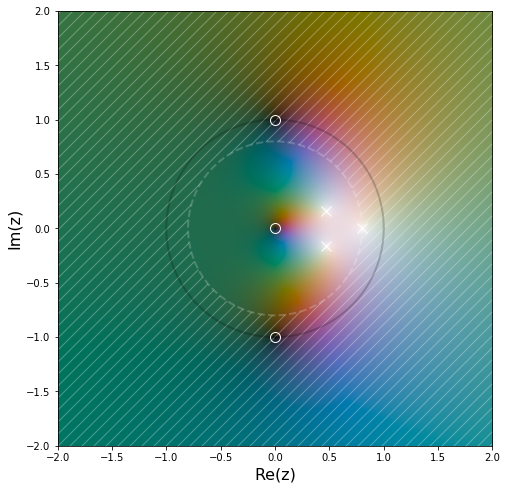

In [66]:
import numpy as np
from functools import reduce

z0 = np.array( [
    0,
    1.j,
    -1.j
] )
zp = np.array( [
    (1./2.) * np.exp( 1.j / 3. ),
    (1./2.) * np.exp( -1.j / 3. ),
    8./10.
] )

def H(z):
    num = reduce( lambda x, y: x * y, [z - x for x in z0], 1. )
    den = reduce( lambda x, y: x * y, [z - x for x in zp], 1. )
    
    return num / den

plt.figure( figsize = (8, 8) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.5 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )

plt.plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.2 )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    plt.plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )
    
r = 4./5.
    
n, radii = 50, [r, 4.]
x_bd = r * np.cos( omega )
y_bd = r * np.sin( omega )
plt.plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.2 )

theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x_roc = np.outer(radii, np.cos(theta))
y_roc = np.outer(radii, np.sin(theta))
x_roc[1,:] = x_roc[1,::-1]
y_roc[1,:] = y_roc[1,::-1]

plt.fill( np.ravel( x_roc ), np.ravel( y_roc ),
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

plt.xlim( -2, 2 )
plt.ylim( -2, 2 )

plt.show()

From this diagram, we also immediately see that the ROC of this system *includes the unit circle* (in black). As we showed above, this means that our system is, in fact, *BIBO stable*!

***

**TODO: Rational variants**: largest / smallest pole theorems